# Importing Libraries

In [ ]:
pip install pandas seaborn matplotlib imblearn scikit-learn



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [109]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

# Models Libraries
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, ConfusionMatrixDisplay

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Load data and EDA

In [85]:
#from google.colab import drive

#drive.mount('/content/gdrive')

data = pd.read_csv('dataset.csv', encoding='utf-8')

In [89]:
pd.options.display.float_format = '{:.2f}'.format


def perform_eda(df: pd.DataFrame):
    print("========================================")
    print("Exploratory Data Analysis")
    print("========================================\n")

    # Print the shape of the DataFrame
    print("Shape of the DataFrame:")
    print(f"Number of rows: {df.shape[0]}")
    print(f"Number of columns: {df.shape[1]}\n")

    print("========================================\n")

    # Print the column names
    print("Columns in the DataFrame:")
    for col in df.columns:
        print(col)
    print("\n========================================\n")

    # Print the information about the DataFrame
    print("Information about the DataFrame:")
    df.info()
    print("\n========================================\n")

    # Print the first 10 rows/records
    print("The first 10 rows:")
    print(df.head(10))
    print("\n========================================\n")

    # Print the last 10 rows/records
    print("The last 10 rows:")
    print(df.tail(10))
    print("\n========================================\n")

    # Print the number of null values in each column
    print("Number of null values in each column:")
    print(df.isnull().sum())
    print("\n========================================\n")

    # Print the number of unique values in each column
    print("Number of unique values in each column:")
    print(df.nunique())
    print("\n========================================\n")

    # Print the descriptive statistics for each column
    print("Descriptive statistics for each column:")
    return df.describe()
    print("\n========================================\n")

perform_eda(data)

Exploratory Data Analysis

Shape of the DataFrame:
Number of rows: 6362616
Number of columns: 11


Columns in the DataFrame:
step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 6362616 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


The first 10 rows:
   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815      170136.00       160296.36   
1    

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362616.00,6362616.00,6362616.00,6362616.00,6362616.00,6362616.00,6362616.00,6362616.00
mean,243.40,179844.32,833865.26,855098.98,1100646.40,1224926.66,0.00,0.00
std,142.33,602724.41,2888062.82,2923927.55,3396267.73,3671256.10,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.65,14208.00,0.00,132705.84,214661.44,0.00,0.00
75%,335.00,208721.33,107315.00,144258.08,943036.71,1111909.04,0.00,0.00
max,743.00,73823490.36,50399045.08,43686616.33,355553416.30,356015889.35,1.00,1.00


In [6]:
filename="descriptive_statistics.csv"
description = data.describe()
    
# Print the descriptive statistics for each column
print("Descriptive statistics for each column:")
print(description)
print("\n========================================\n")
    
# Save the descriptive statistics to a CSV file
description.to_csv(filename)
print(f"Descriptive statistics saved to {filename}")

Descriptive statistics for each column:
            step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count 6362620.00  6362620.00     6362620.00      6362620.00      6362620.00   
mean      243.40   179861.90      833883.10       855113.67      1100701.67   
std       142.33   603858.23     2888242.67      2924048.50      3399180.11   
min         1.00        0.00           0.00            0.00            0.00   
25%       156.00    13389.57           0.00            0.00            0.00   
50%       239.00    74871.94       14208.00            0.00       132705.66   
75%       335.00   208721.48      107315.18       144258.41       943036.71   
max       743.00 92445516.64    59585040.37     49585040.37    356015889.35   

       newbalanceDest    isFraud  isFlaggedFraud  
count      6362620.00 6362620.00      6362620.00  
mean       1224996.40       0.00            0.00  
std        3674128.94       0.04            0.00  
min              0.00       0.00            

# Handling Outliers

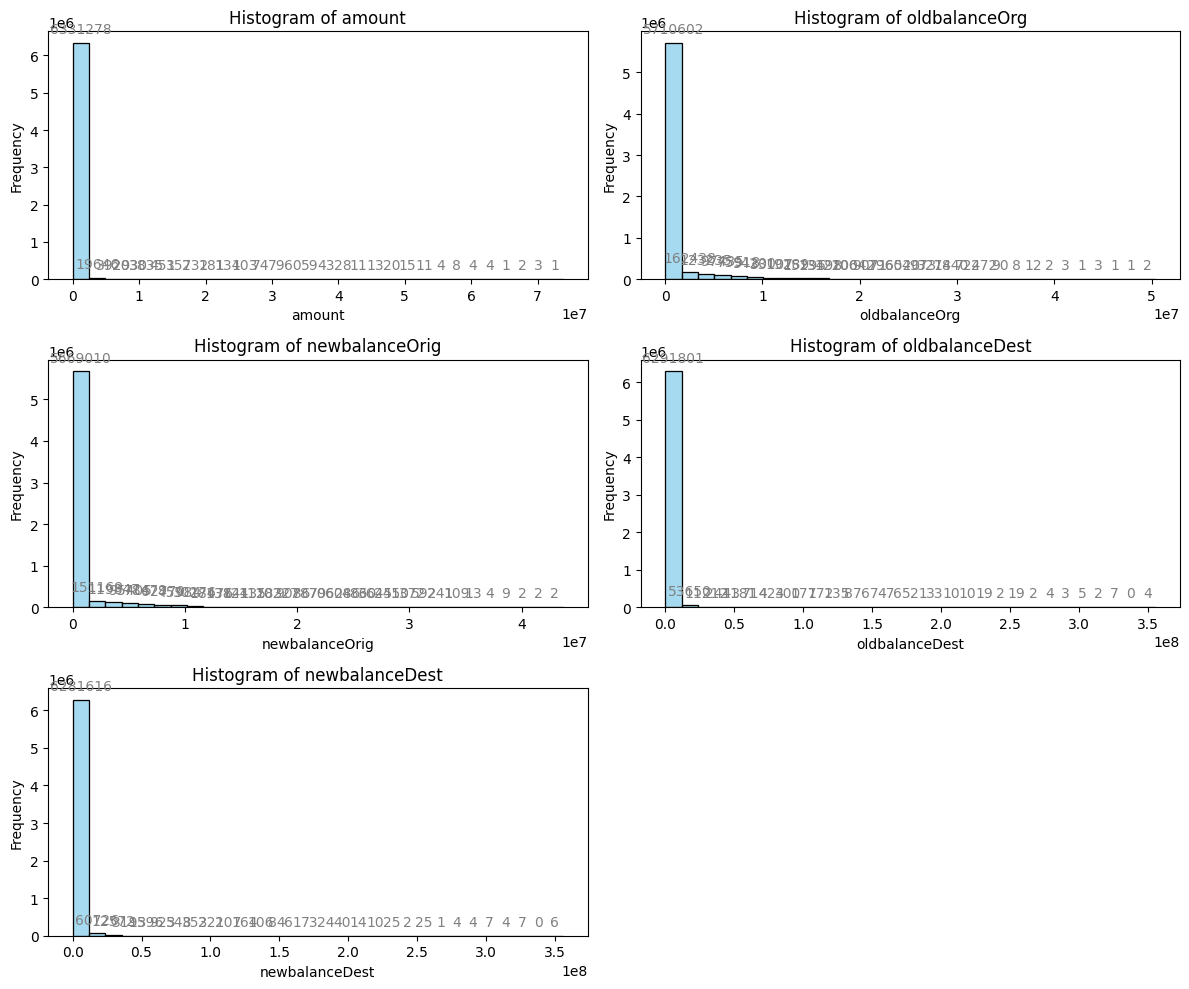

In [84]:
# List of columns to plot histograms
target_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Plotting
plt.figure(figsize=(12, 10))  # Adjust the size of the figure as needed
for i, column in enumerate(target_columns, 1):
    plt.subplot(3, 2, i)  # Adjust the grid parameters based on the number of columns
    ax = sns.histplot(data[column], kde=False, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

    # Adding the count above each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='gray', rotation=0, xytext=(0, 10),
                    textcoords='offset points')

plt.tight_layout()
plt.show()


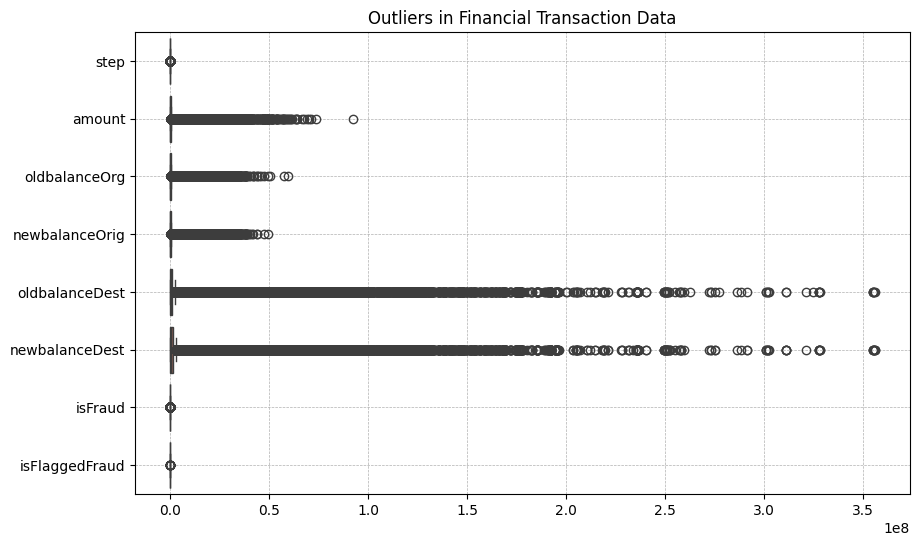

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient='h')  # 'h' for horizontal box plots
plt.title('Outliers in Financial Transaction Data')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Enhanced grid for better readability
plt.show()

In [86]:
def remove_top_extremes(df, columns, n):
    """
    Removes the top 'n' extreme values from the specified columns of a DataFrame.
    
    Parameters:
        df (DataFrame): The DataFrame to process.
        columns (list of str): List of column names to remove extremes from.
        n (int): Number of extreme values to remove from each specified column.
    
    Returns:
        DataFrame: A new DataFrame with the extremes removed.
    """
    # Create a copy of the DataFrame to avoid modifying the original data
    cleaned_data = df.copy()
    
    for column, num_extremes in zip(columns, n):
            if column in df.columns:
                # Find the threshold above which data will be considered extreme
                # and to be removed - this is the nth largest value in the column
                threshold = df[column].nlargest(num_extremes).min()
                
                # Filter out the extremes
                cleaned_data = cleaned_data[cleaned_data[column] < threshold]
    
    return cleaned_data

# Specify the columns and how many extreme values to remove
target_columns = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
extreme_values_to_remove = [1, 2, 2, 1, 1]  # Change this to adjust how many extremes you want to remove

# Remove extremes
data = remove_top_extremes(data, target_columns, extreme_values_to_remove)

# Optionally, check the difference
print("Original data count: ", data.shape[0])
print("Data count after removing outliers: ", data.shape[0])


Original data count:  6362616
Data count after removing outliers:  6362616


In [24]:
perform_eda(data)

Exploratory Data Analysis

Shape of the DataFrame:
Number of rows: 6362616
Number of columns: 11


Columns in the DataFrame:
step
type
amount
nameOrig
oldbalanceOrg
newbalanceOrig
nameDest
oldbalanceDest
newbalanceDest
isFraud
isFlaggedFraud


Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 6362616 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 582.5+ MB


The first 10 rows:
   step      type   amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT  9839.64  C1231006815      170136.00       160296.36   
1    

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362616.00,6362616.00,6362616.00,6362616.00,6362616.00,6362616.00,6362616.00,6362616.00
mean,243.40,179844.32,833865.26,855098.98,1100646.40,1224926.66,0.00,0.00
std,142.33,602724.41,2888062.82,2923927.55,3396267.73,3671256.10,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.65,14208.00,0.00,132705.84,214661.44,0.00,0.00
75%,335.00,208721.33,107315.00,144258.08,943036.71,1111909.04,0.00,0.00
max,743.00,73823490.36,50399045.08,43686616.33,355553416.30,356015889.35,1.00,1.00


# Analysis and exploration of categories of the "type" feature

In [25]:
# check labels in "type" feature
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [26]:
data['type'].value_counts()

type
CASH_OUT    2237499
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532906
DEBIT         41432
Name: count, dtype: int64

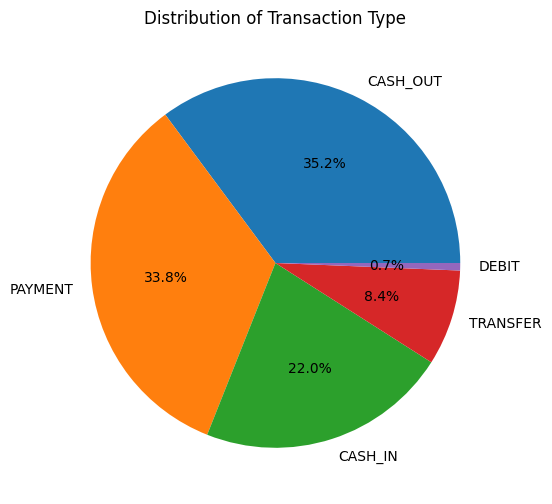

In [27]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(quantity, labels = transactions, autopct='%1.1f%%')
plt.title("Distribution of Transaction Type")
plt.show()

# Label Encoding

In [90]:
# Encode 'type' column using LabelEncoder
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

In [91]:
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Mapping: {'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


In [92]:
data['type'].value_counts()

type
1    2237499
3    2151495
0    1399284
4     532906
2      41432
Name: count, dtype: int64

In [93]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,3,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,3,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


# Analysis and exploration of categories of the "step" feature


Text(0.5, 0.01, 'Interactive Feature Plot')

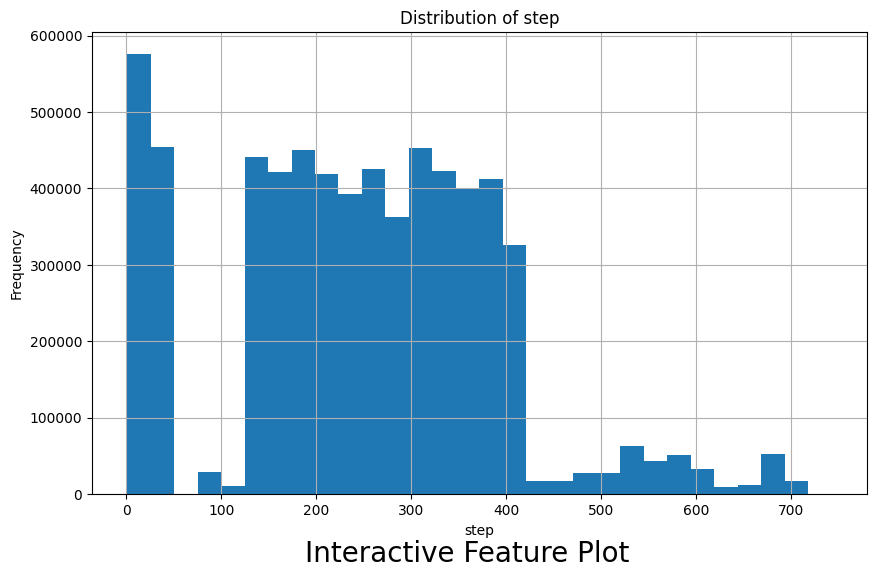

In [40]:
plt.figure(figsize=(10,6))
data['step'].hist(bins=30)
plt.title(f'Distribution of step')
plt.xlabel('step')
plt.ylabel('Frequency')
plt.figtext(0.5, 0.01, 'Interactive Feature Plot', ha='center', va='center', fontsize=20)



# Analysis and exploration of categories of the "isFraud" feature

In [21]:
# check labels in "isFraud" feature
data['isFraud'].unique()
data['isFlaggedFraud'].unique()

array([0, 1])

In [23]:
data['isFraud'].value_counts()
#cleaned_data['isFlaggedFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

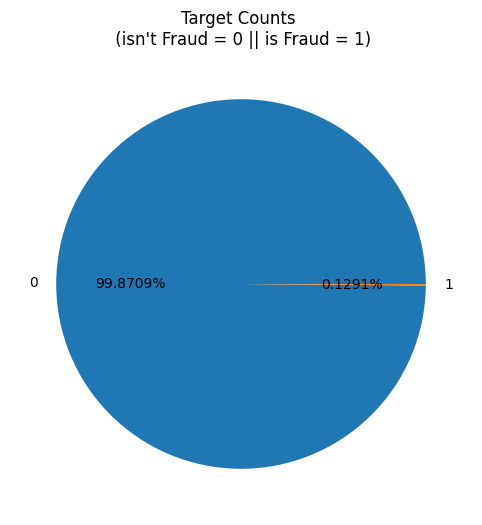

In [43]:
Target_counts = cleaned_data['isFraud'].value_counts()

# Plot
plt.figure(figsize=(10,6))
plt.pie(Target_counts.values, labels = Target_counts.index, autopct='%1.4f%%')
plt.title('Target Counts \n (isn\'t Fraud = 0 || is Fraud = 1)')
plt.show()

# Dropping unnecessary features

In [99]:
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [100]:
data.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [34]:
data.shape # (rows, columns)

(6362616, 9)

# Correlation among features

In [47]:
# The correlation between features
# Understanding the correlation between various features in the dataset
# Select only the numeric columns

cleaned_data.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.012627,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
type,0.012627,1.000000,0.198987,0.260418,0.270669,0.066255,0.079111,0.016171,0.003144
amount,0.022373,0.198987,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,0.260418,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,0.270669,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.066255,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.079111,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.016171,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.003144,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


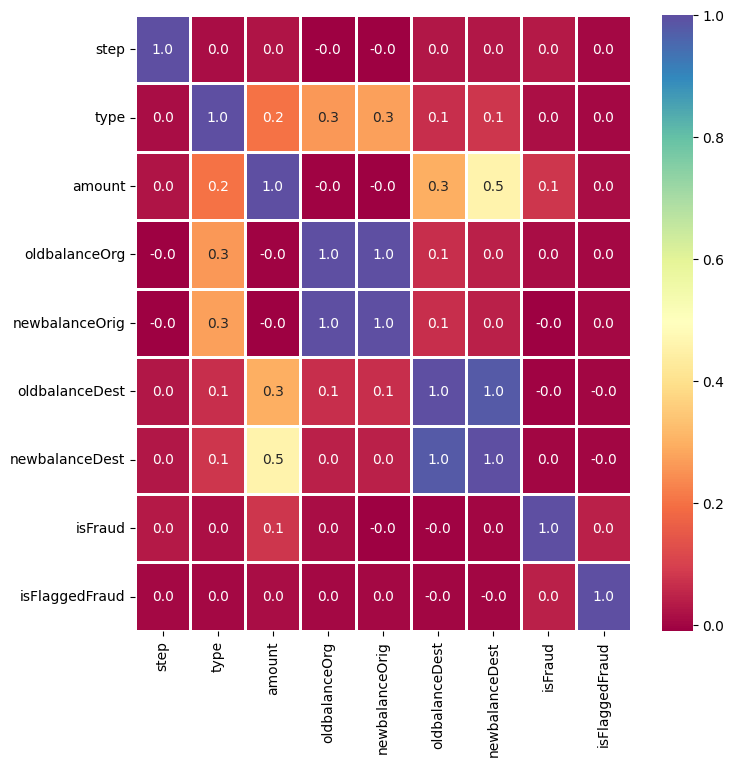

In [48]:
plt.figure(figsize=(8, 8))
sns.heatmap(data.corr(), annot=True, linewidths=0.9, fmt=".1f", cmap='Spectral')
plt.show()

# Correlation between <b>oldbalanceOrg</b> and <b>newbalanceOrig</b> = (0.99)

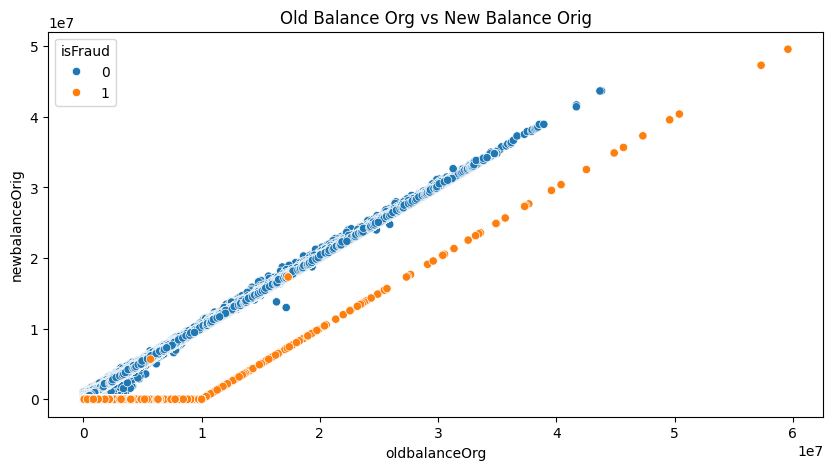

In [49]:
#Visualizing the relationship between 'oldbalanceOrg' and 'newbalanceOrig'
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceOrg', y='newbalanceOrig', hue='isFraud', data=data)
plt.title('Old Balance Org vs New Balance Orig')
plt.show()

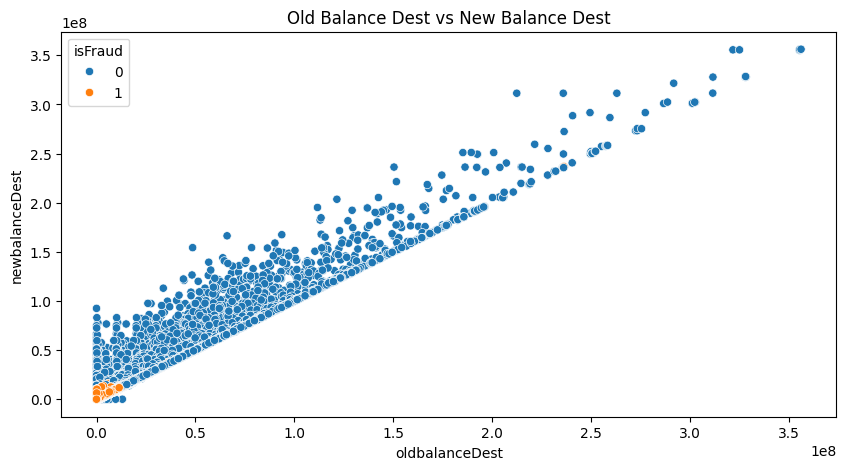

In [3]:
#Visualizing the relationship between 'oldbalanceDest' and 'newbalanceDest'
plt.figure(figsize=(10,5))
sns.scatterplot(x='oldbalanceDest', y='newbalanceDest', hue='isFraud', data=data)
plt.title('Old Balance Dest vs New Balance Dest')
plt.show()

# Dropping unnecessary features based on correlation

In [101]:
data.drop(['isFlaggedFraud', 'step'], axis=1, inplace=True)

In [102]:
data.columns

Index(['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud'],
      dtype='object')

In [103]:
data.shape

(6362616, 7)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6362616 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            int64  
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFraud         int64  
dtypes: float64(5), int64(2)
memory usage: 388.3 MB


In [42]:
data.head() # Default : first 5 rows

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.00,160296.36,0.00,0.00,0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0
2,3,181.00,181.00,0.00,0.00,0.00,1
3,0,181.00,181.00,0.00,21182.00,0.00,1
4,1,11668.14,41554.00,29885.86,0.00,0.00,0


In [55]:
data.tail() # Default : last 5 rows

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
6362615,0,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,3,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,0,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,3,850002.52,850002.52,0.0,0.00,0.00,1
6362619,0,850002.52,850002.52,0.0,6510099.11,7360101.63,1


In [41]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
type,6362616.00,1.06,0.98,0.00,0.00,1.00,2.00,4.00
amount,6362616.00,179844.32,602724.41,0.00,13389.57,74871.65,208721.33,73823490.36
oldbalanceOrg,6362616.00,833865.26,2888062.82,0.00,0.00,14208.00,107315.00,50399045.08
newbalanceOrig,6362616.00,855098.98,2923927.55,0.00,0.00,0.00,144258.08,43686616.33
oldbalanceDest,6362616.00,1100646.40,3396267.73,0.00,0.00,132705.84,943036.71,355553416.30
newbalanceDest,6362616.00,1224926.66,3671256.10,0.00,0.00,214661.44,1111909.04,356015889.35
isFraud,6362616.00,0.00,0.04,0.00,0.00,0.00,0.00,1.00


# ⚑ Splitting the data and target

In [111]:
# X Data
X = data.drop(['isFraud'], axis=1)
print('X shape is : ' , X.shape)
print()

# y Data
y = data['isFraud']
print('y shape is : ' , y.shape)

X shape is :  (6362616, 6)

y shape is :  (6362616,)


In [112]:
y.value_counts()

isFraud
0    6354405
1       8211
Name: count, dtype: int64

In [113]:
X.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,3,9839.64,170136.00,160296.36,0.00,0.00
1,3,1864.28,21249.00,19384.72,0.00,0.00
2,4,181.00,181.00,0.00,0.00,0.00
3,1,181.00,181.00,0.00,21182.00,0.00
4,3,11668.14,41554.00,29885.86,0.00,0.00


# Classification algorithm to execute experiments automatic


RandomUnderSampler + StandardScaler + max_iter=10


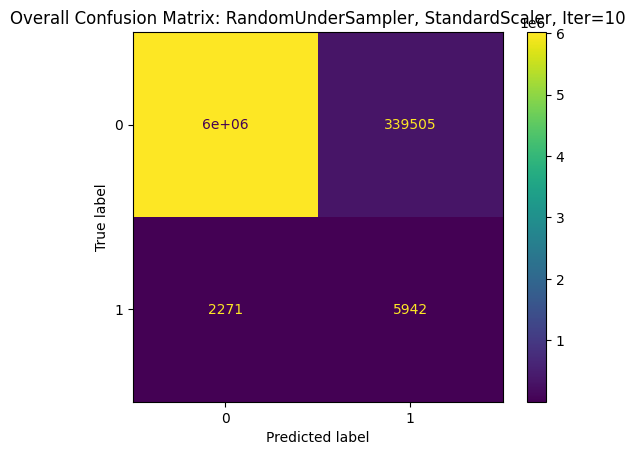

Metrics - Accuracy: 94.63%, Precision: 1.72%, Recall: 72.35%, F1-Score: 3.36%, AUC-ROC: 83.50%

RandomUnderSampler + StandardScaler + max_iter=30


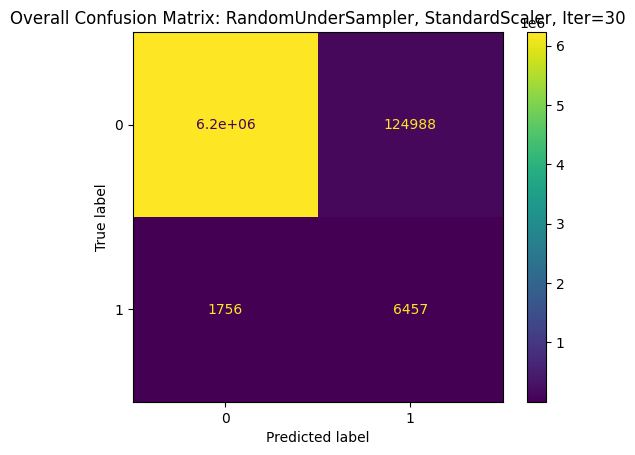

Metrics - Accuracy: 98.01%, Precision: 4.91%, Recall: 78.62%, F1-Score: 9.25%, AUC-ROC: 88.33%

RandomUnderSampler + StandardScaler + max_iter=50


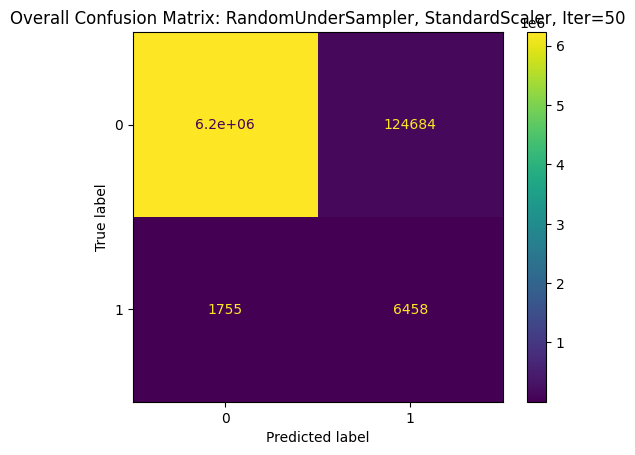

Metrics - Accuracy: 98.01%, Precision: 4.92%, Recall: 78.63%, F1-Score: 9.27%, AUC-ROC: 88.33%

RandomUnderSampler + StandardScaler + max_iter=100


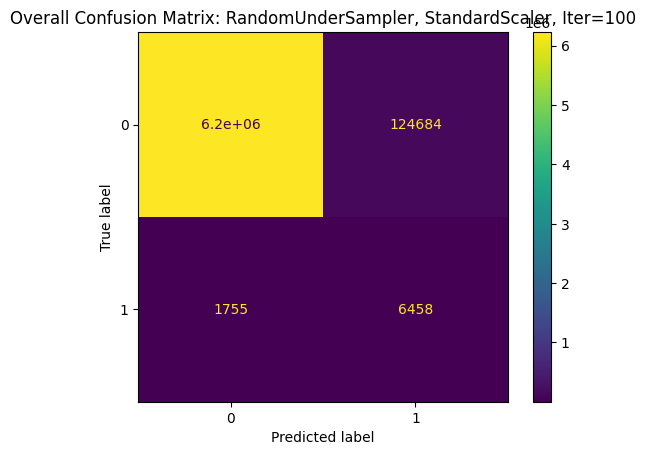

Metrics - Accuracy: 98.01%, Precision: 4.92%, Recall: 78.63%, F1-Score: 9.27%, AUC-ROC: 88.33%

RandomUnderSampler + MinMaxScaler + max_iter=10


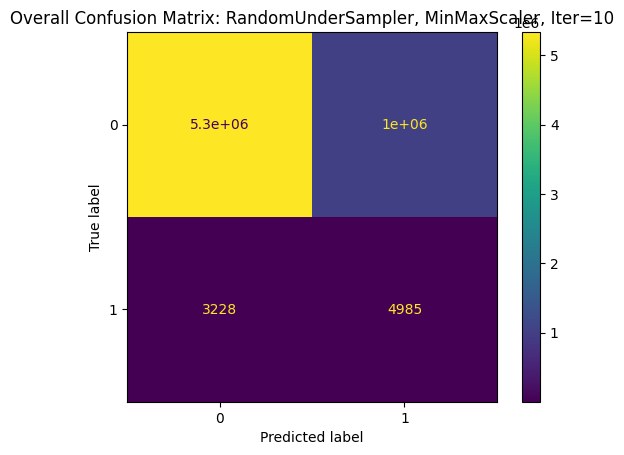

Metrics - Accuracy: 83.94%, Precision: 0.49%, Recall: 60.70%, F1-Score: 0.97%, AUC-ROC: 72.34%

RandomUnderSampler + MinMaxScaler + max_iter=30


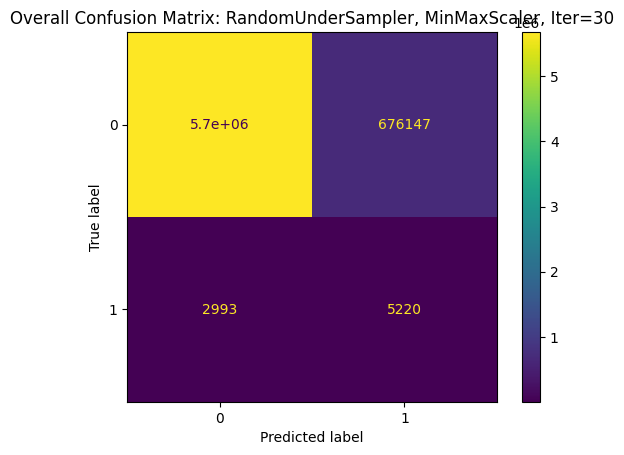

Metrics - Accuracy: 89.33%, Precision: 0.77%, Recall: 63.56%, F1-Score: 1.51%, AUC-ROC: 76.46%

RandomUnderSampler + MinMaxScaler + max_iter=50


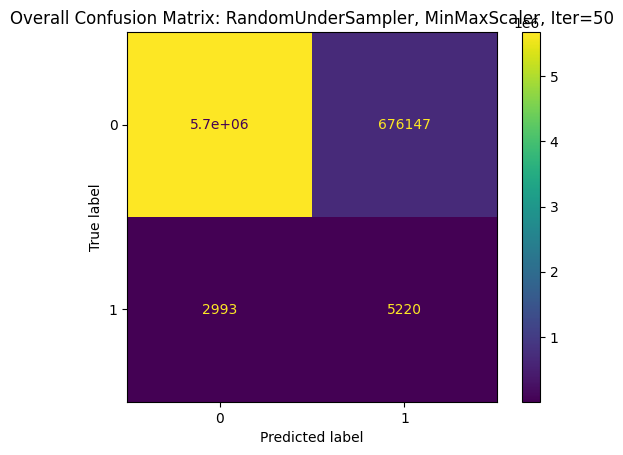

Metrics - Accuracy: 89.33%, Precision: 0.77%, Recall: 63.56%, F1-Score: 1.51%, AUC-ROC: 76.46%

RandomUnderSampler + MinMaxScaler + max_iter=100


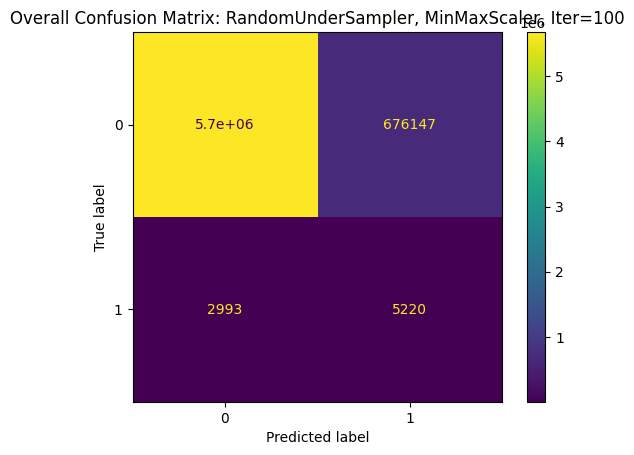

Metrics - Accuracy: 89.33%, Precision: 0.77%, Recall: 63.56%, F1-Score: 1.51%, AUC-ROC: 76.46%

RandomUnderSampler + RobustScaler + max_iter=10


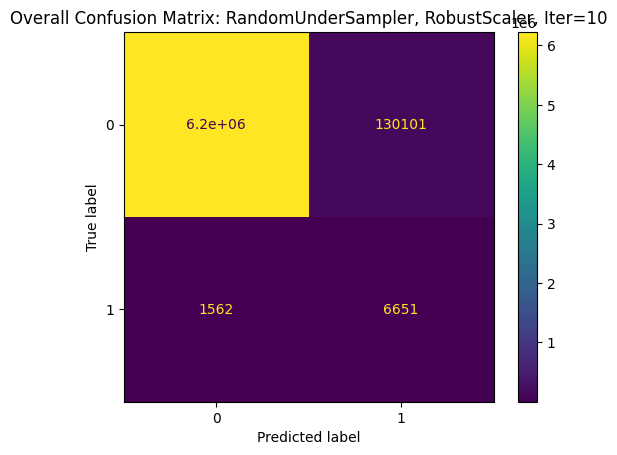

Metrics - Accuracy: 97.93%, Precision: 4.86%, Recall: 80.98%, F1-Score: 9.18%, AUC-ROC: 89.47%

RandomUnderSampler + RobustScaler + max_iter=30


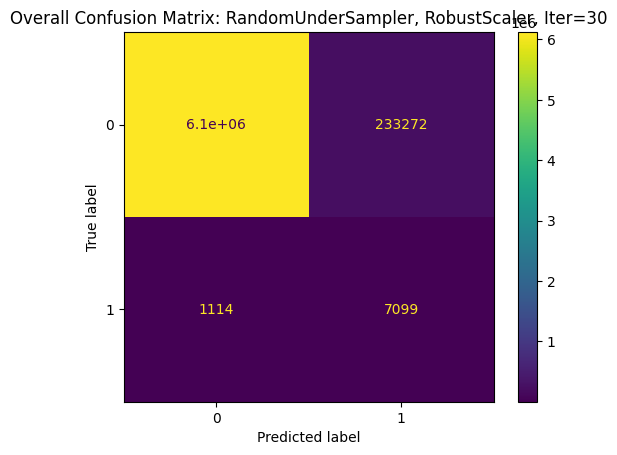

Metrics - Accuracy: 96.32%, Precision: 2.95%, Recall: 86.44%, F1-Score: 5.71%, AUC-ROC: 91.38%

RandomUnderSampler + RobustScaler + max_iter=50


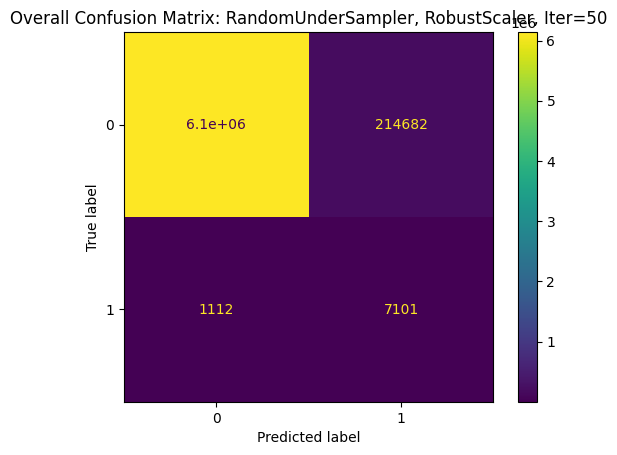

Metrics - Accuracy: 96.61%, Precision: 3.20%, Recall: 86.46%, F1-Score: 6.17%, AUC-ROC: 91.54%

RandomUnderSampler + RobustScaler + max_iter=100


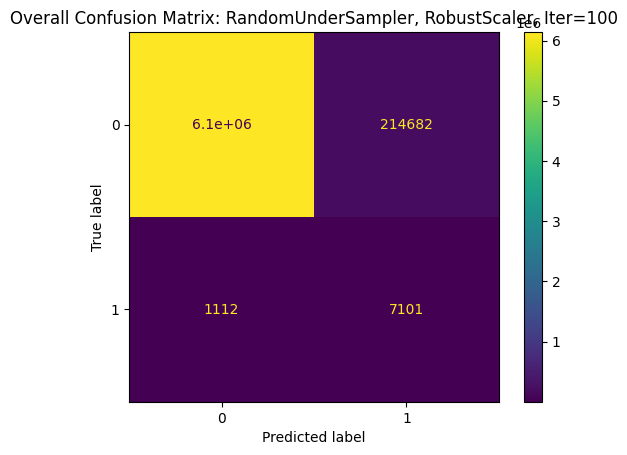

Metrics - Accuracy: 96.61%, Precision: 3.20%, Recall: 86.46%, F1-Score: 6.17%, AUC-ROC: 91.54%

NearMiss + StandardScaler + max_iter=10


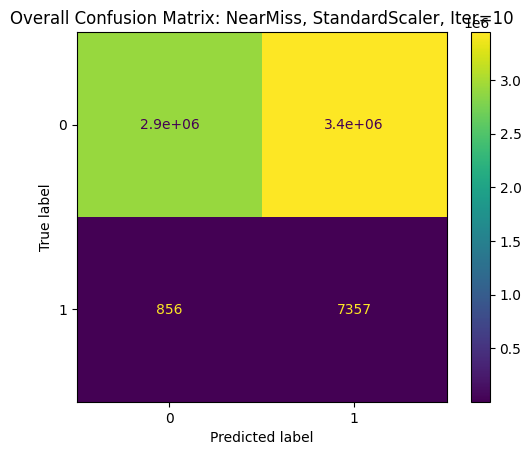

Metrics - Accuracy: 45.84%, Precision: 0.21%, Recall: 89.58%, F1-Score: 0.43%, AUC-ROC: 67.68%

NearMiss + StandardScaler + max_iter=30


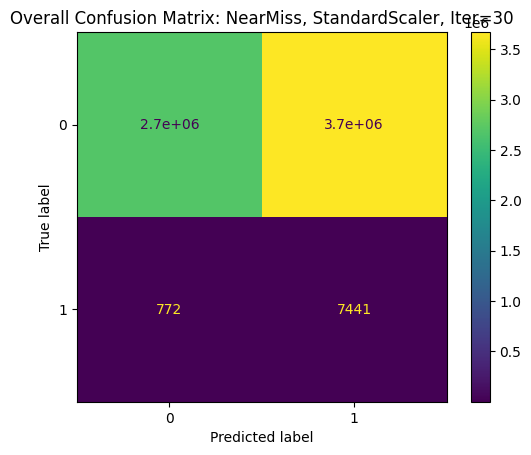

Metrics - Accuracy: 42.32%, Precision: 0.20%, Recall: 90.60%, F1-Score: 0.40%, AUC-ROC: 66.43%

NearMiss + StandardScaler + max_iter=50


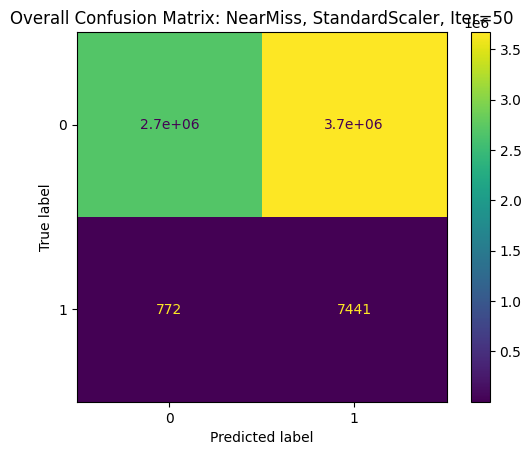

Metrics - Accuracy: 42.32%, Precision: 0.20%, Recall: 90.60%, F1-Score: 0.40%, AUC-ROC: 66.43%

NearMiss + StandardScaler + max_iter=100


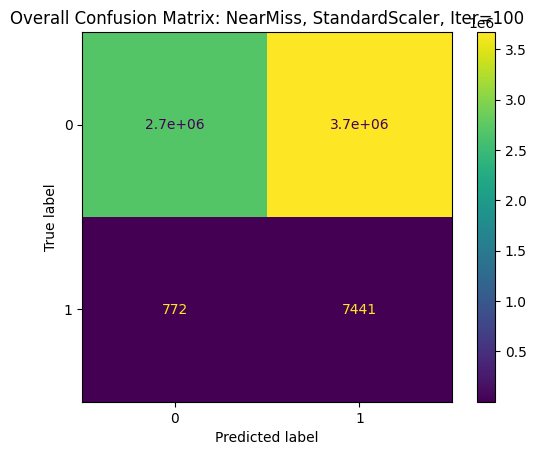

Metrics - Accuracy: 42.32%, Precision: 0.20%, Recall: 90.60%, F1-Score: 0.40%, AUC-ROC: 66.43%

NearMiss + MinMaxScaler + max_iter=10


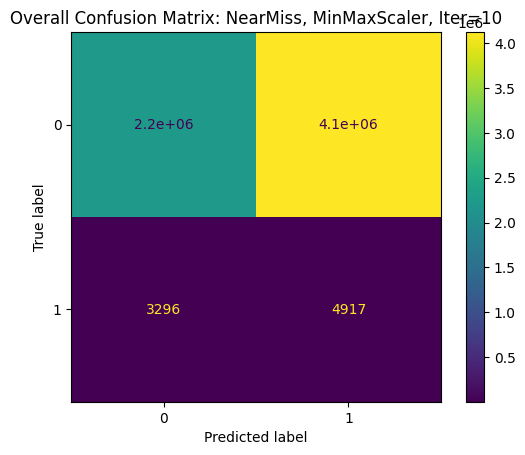

Metrics - Accuracy: 35.14%, Precision: 0.12%, Recall: 59.87%, F1-Score: 0.24%, AUC-ROC: 47.49%

NearMiss + MinMaxScaler + max_iter=30


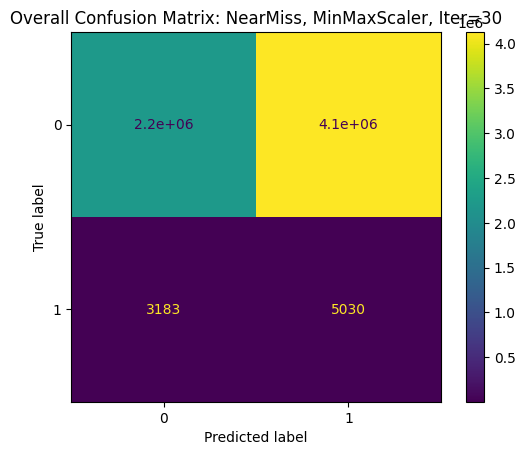

Metrics - Accuracy: 35.07%, Precision: 0.12%, Recall: 61.24%, F1-Score: 0.24%, AUC-ROC: 48.14%

NearMiss + MinMaxScaler + max_iter=50


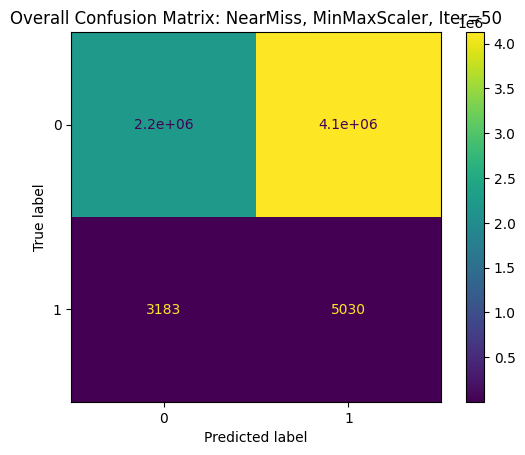

Metrics - Accuracy: 35.07%, Precision: 0.12%, Recall: 61.24%, F1-Score: 0.24%, AUC-ROC: 48.14%

NearMiss + MinMaxScaler + max_iter=100


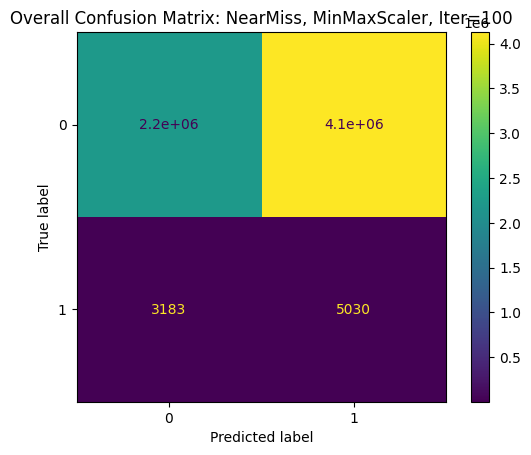

Metrics - Accuracy: 35.07%, Precision: 0.12%, Recall: 61.24%, F1-Score: 0.24%, AUC-ROC: 48.14%

NearMiss + RobustScaler + max_iter=10


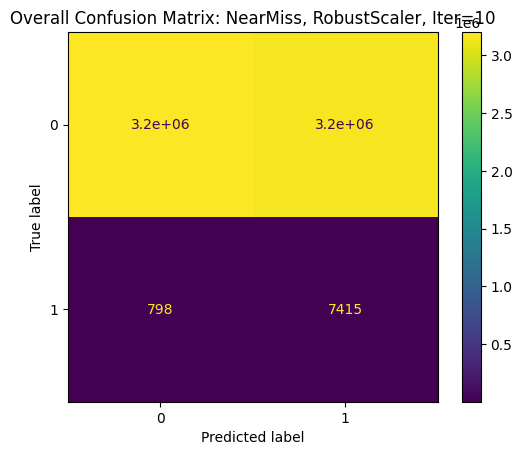

Metrics - Accuracy: 50.42%, Precision: 0.23%, Recall: 90.28%, F1-Score: 0.47%, AUC-ROC: 70.33%

NearMiss + RobustScaler + max_iter=30


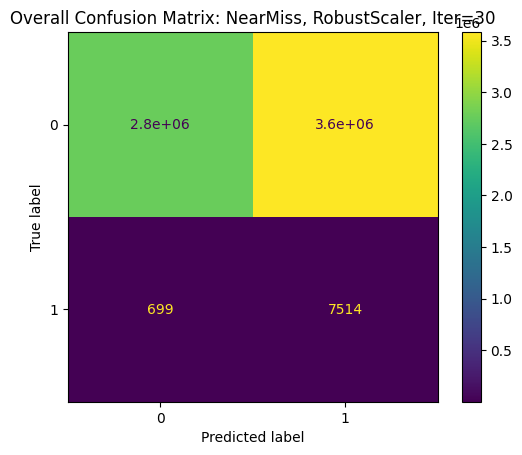

Metrics - Accuracy: 43.67%, Precision: 0.21%, Recall: 91.49%, F1-Score: 0.42%, AUC-ROC: 67.55%

NearMiss + RobustScaler + max_iter=50


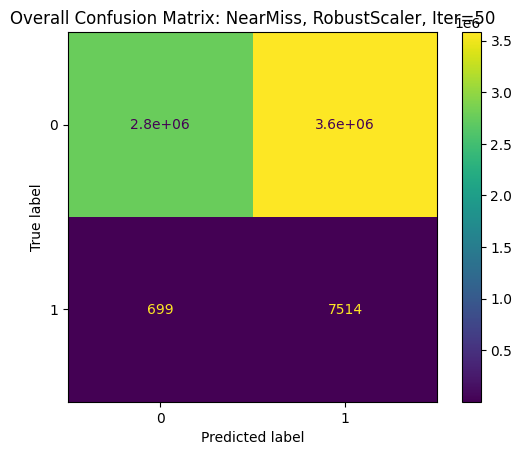

Metrics - Accuracy: 43.67%, Precision: 0.21%, Recall: 91.49%, F1-Score: 0.42%, AUC-ROC: 67.55%

NearMiss + RobustScaler + max_iter=100


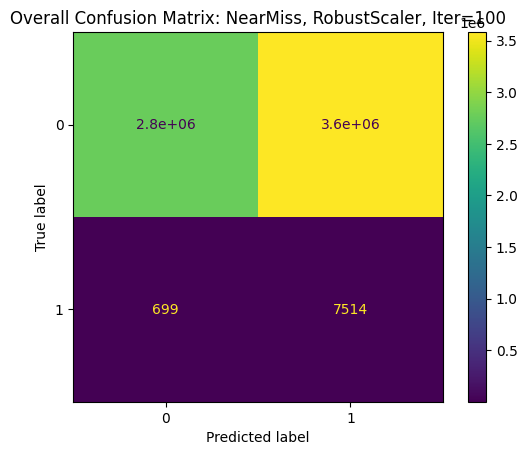

Metrics - Accuracy: 43.67%, Precision: 0.21%, Recall: 91.49%, F1-Score: 0.42%, AUC-ROC: 67.55%

SMOTE + StandardScaler + max_iter=10


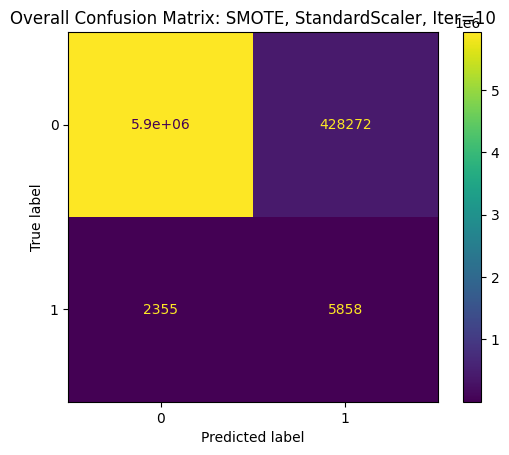

Metrics - Accuracy: 93.23%, Precision: 1.35%, Recall: 71.33%, F1-Score: 2.65%, AUC-ROC: 82.29%

SMOTE + StandardScaler + max_iter=30


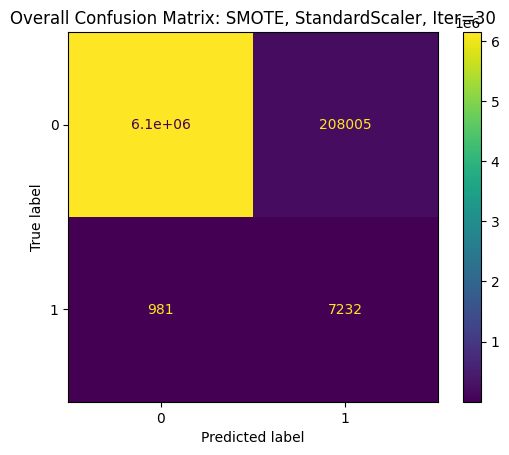

Metrics - Accuracy: 96.72%, Precision: 3.36%, Recall: 88.06%, F1-Score: 6.47%, AUC-ROC: 92.39%

SMOTE + StandardScaler + max_iter=50


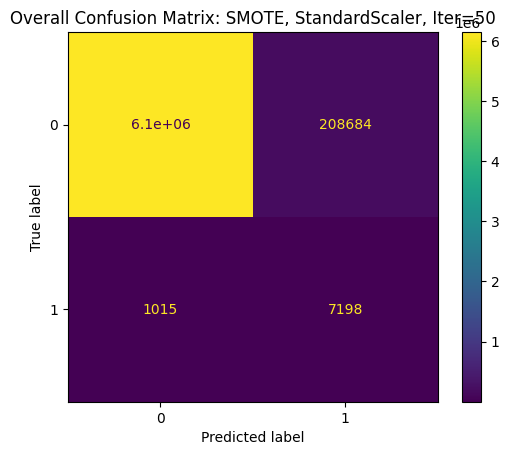

Metrics - Accuracy: 96.70%, Precision: 3.33%, Recall: 87.64%, F1-Score: 6.42%, AUC-ROC: 92.18%

SMOTE + StandardScaler + max_iter=100


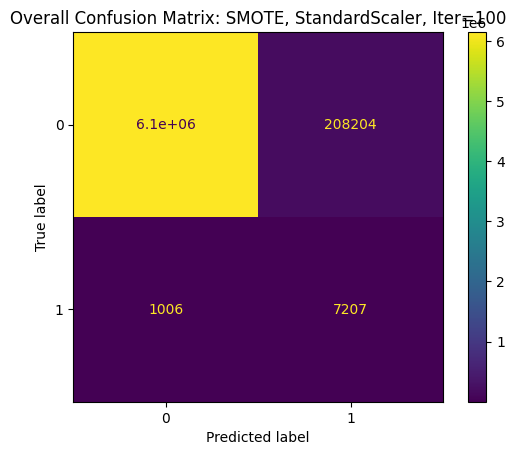

Metrics - Accuracy: 96.71%, Precision: 3.35%, Recall: 87.75%, F1-Score: 6.45%, AUC-ROC: 92.24%

SMOTE + MinMaxScaler + max_iter=10


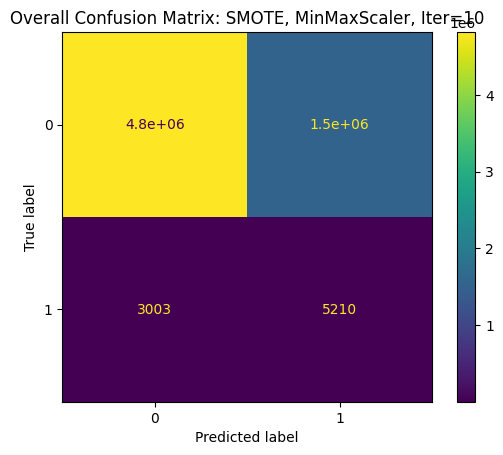

Metrics - Accuracy: 75.78%, Precision: 0.34%, Recall: 63.44%, F1-Score: 0.67%, AUC-ROC: 69.62%

SMOTE + MinMaxScaler + max_iter=30


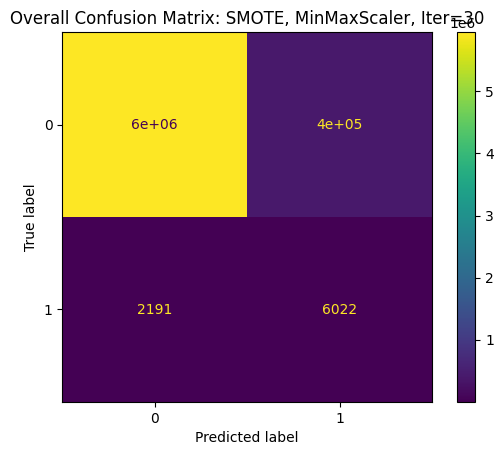

Metrics - Accuracy: 93.68%, Precision: 1.48%, Recall: 73.32%, F1-Score: 2.91%, AUC-ROC: 83.52%

SMOTE + MinMaxScaler + max_iter=50


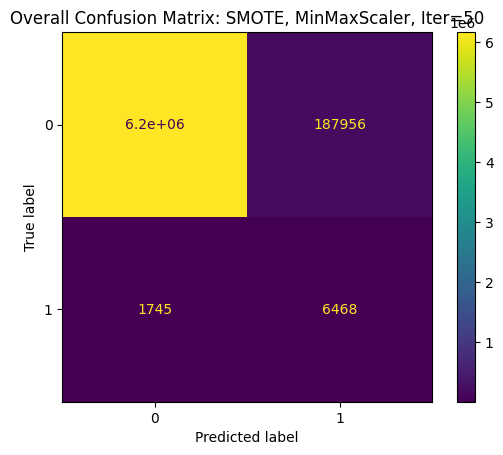

Metrics - Accuracy: 97.02%, Precision: 3.33%, Recall: 78.75%, F1-Score: 6.38%, AUC-ROC: 87.90%

SMOTE + MinMaxScaler + max_iter=100


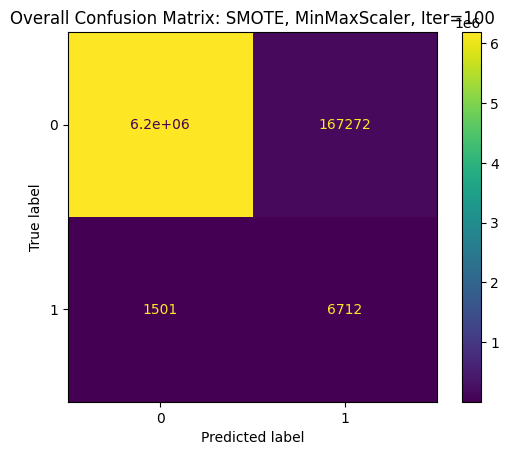

Metrics - Accuracy: 97.35%, Precision: 3.86%, Recall: 81.72%, F1-Score: 7.37%, AUC-ROC: 89.55%

SMOTE + RobustScaler + max_iter=10


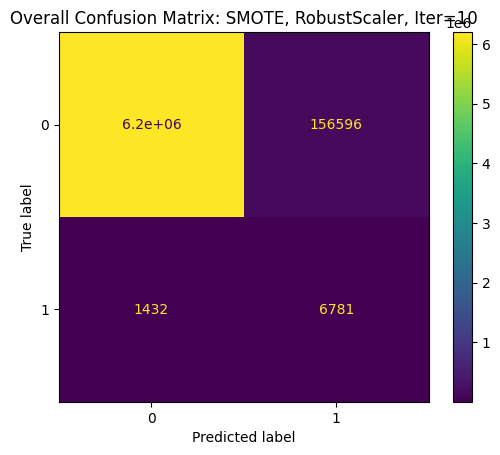

Metrics - Accuracy: 97.52%, Precision: 4.15%, Recall: 82.56%, F1-Score: 7.90%, AUC-ROC: 90.05%

SMOTE + RobustScaler + max_iter=30


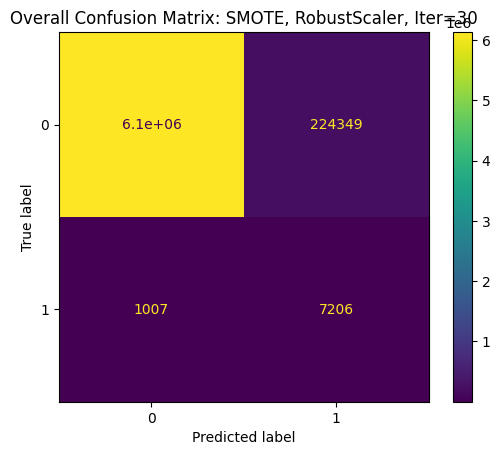

Metrics - Accuracy: 96.46%, Precision: 3.11%, Recall: 87.74%, F1-Score: 6.01%, AUC-ROC: 92.10%

SMOTE + RobustScaler + max_iter=50


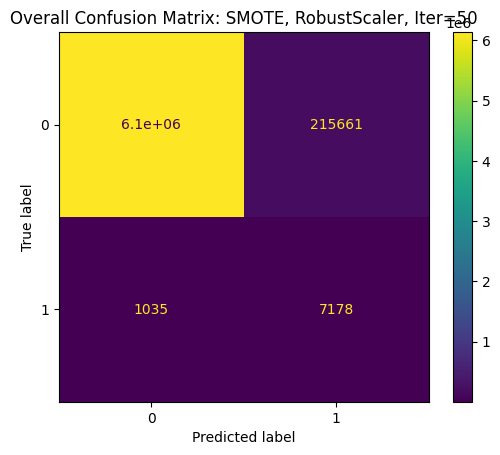

Metrics - Accuracy: 96.59%, Precision: 3.22%, Recall: 87.40%, F1-Score: 6.21%, AUC-ROC: 92.00%

SMOTE + RobustScaler + max_iter=100


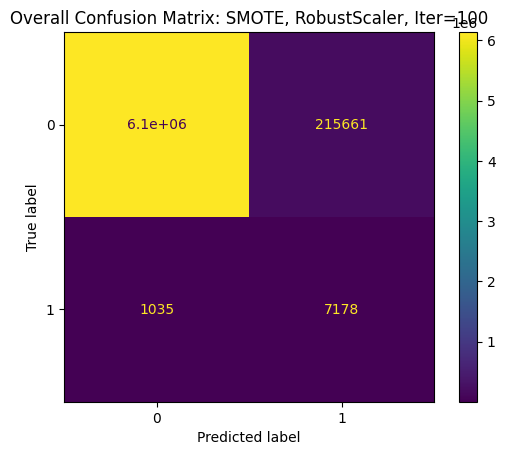

Metrics - Accuracy: 96.59%, Precision: 3.22%, Recall: 87.40%, F1-Score: 6.21%, AUC-ROC: 92.00%

BorderlineSMOTE + StandardScaler + max_iter=10


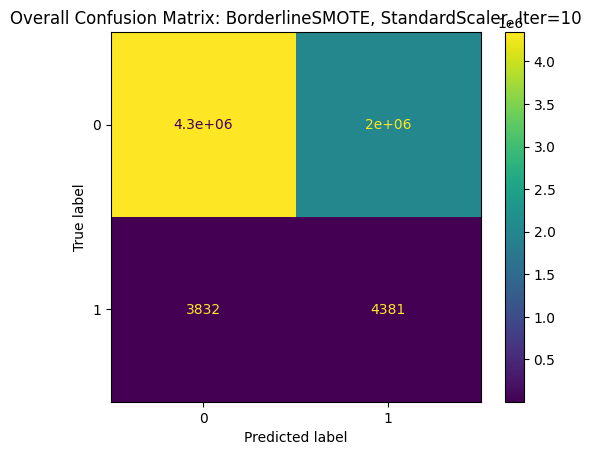

Metrics - Accuracy: 68.32%, Precision: 0.22%, Recall: 53.34%, F1-Score: 0.43%, AUC-ROC: 60.84%

BorderlineSMOTE + StandardScaler + max_iter=30


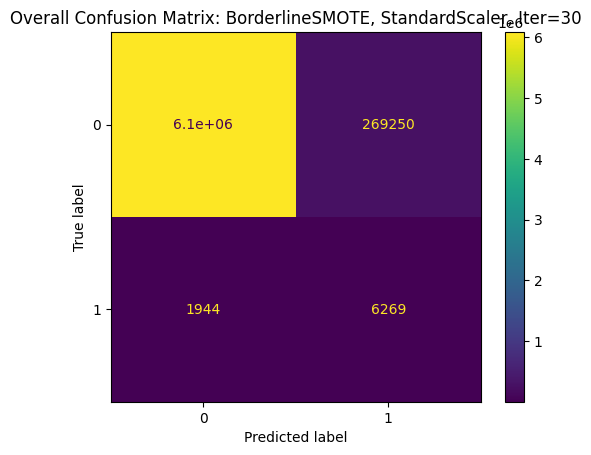

Metrics - Accuracy: 95.74%, Precision: 2.28%, Recall: 76.33%, F1-Score: 4.42%, AUC-ROC: 86.05%

BorderlineSMOTE + StandardScaler + max_iter=50


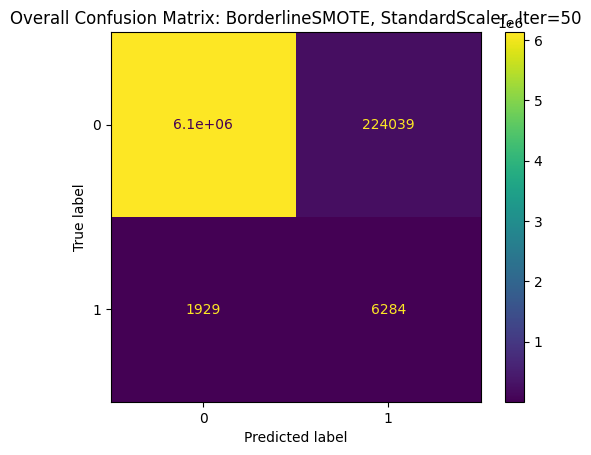

Metrics - Accuracy: 96.45%, Precision: 2.73%, Recall: 76.51%, F1-Score: 5.27%, AUC-ROC: 86.49%

BorderlineSMOTE + StandardScaler + max_iter=100


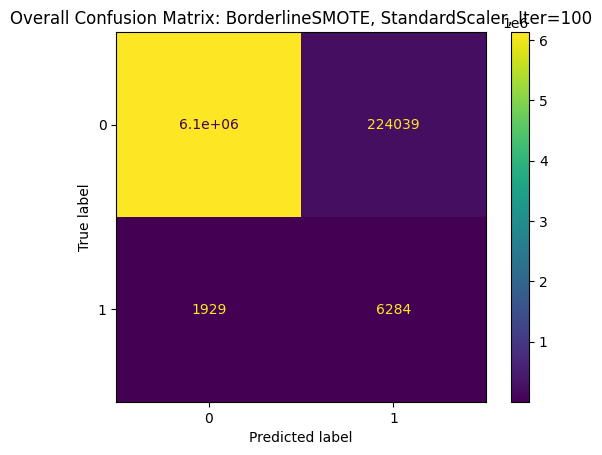

Metrics - Accuracy: 96.45%, Precision: 2.73%, Recall: 76.51%, F1-Score: 5.27%, AUC-ROC: 86.49%

BorderlineSMOTE + MinMaxScaler + max_iter=10


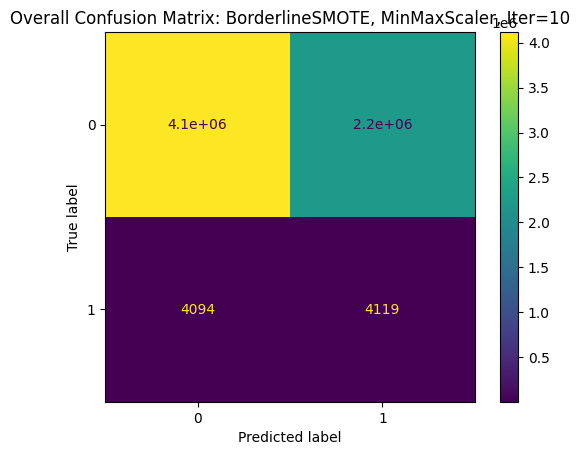

Metrics - Accuracy: 64.78%, Precision: 0.18%, Recall: 50.15%, F1-Score: 0.37%, AUC-ROC: 57.47%

BorderlineSMOTE + MinMaxScaler + max_iter=30


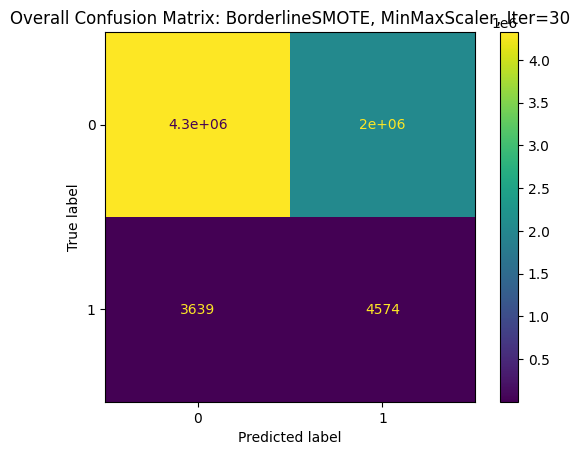

Metrics - Accuracy: 68.02%, Precision: 0.22%, Recall: 55.69%, F1-Score: 0.45%, AUC-ROC: 61.87%

BorderlineSMOTE + MinMaxScaler + max_iter=50


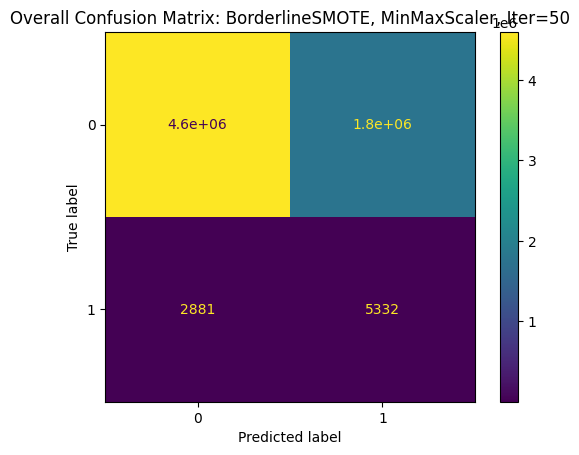

Metrics - Accuracy: 72.25%, Precision: 0.30%, Recall: 64.92%, F1-Score: 0.60%, AUC-ROC: 68.59%

BorderlineSMOTE + MinMaxScaler + max_iter=100


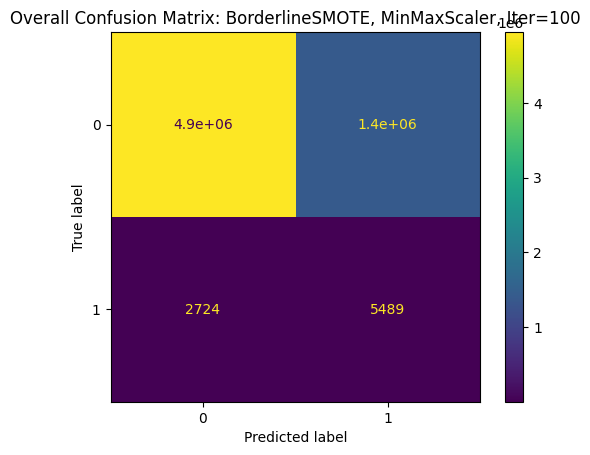

Metrics - Accuracy: 77.84%, Precision: 0.39%, Recall: 66.83%, F1-Score: 0.77%, AUC-ROC: 72.34%

BorderlineSMOTE + RobustScaler + max_iter=10


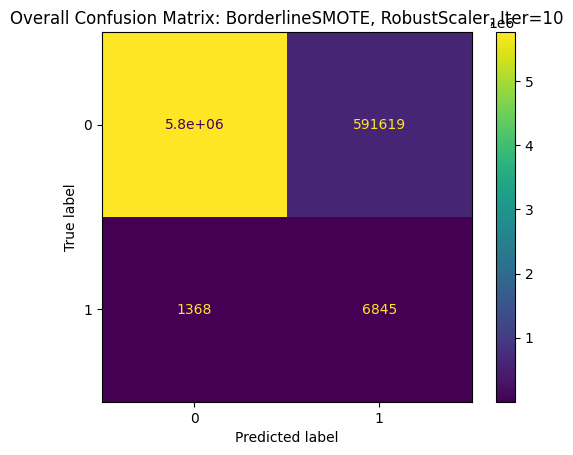

Metrics - Accuracy: 90.68%, Precision: 1.14%, Recall: 83.34%, F1-Score: 2.26%, AUC-ROC: 87.02%

BorderlineSMOTE + RobustScaler + max_iter=30


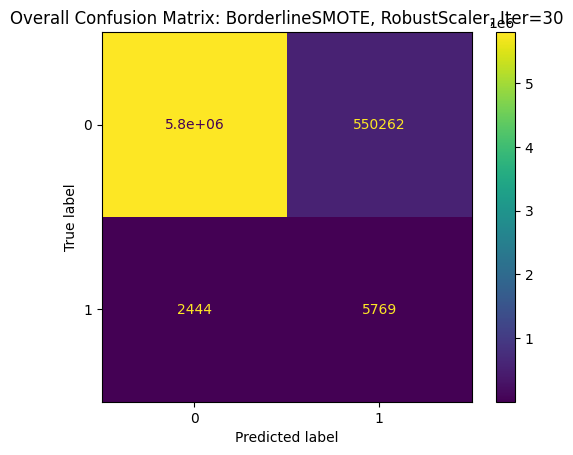

Metrics - Accuracy: 91.31%, Precision: 1.04%, Recall: 70.24%, F1-Score: 2.04%, AUC-ROC: 80.79%

BorderlineSMOTE + RobustScaler + max_iter=50


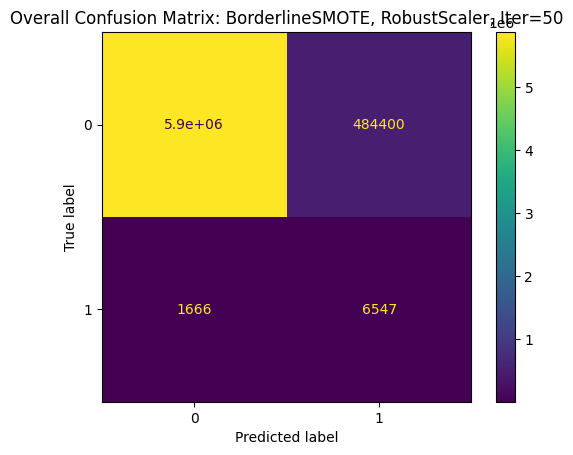

Metrics - Accuracy: 92.36%, Precision: 1.33%, Recall: 79.72%, F1-Score: 2.62%, AUC-ROC: 86.05%

BorderlineSMOTE + RobustScaler + max_iter=100


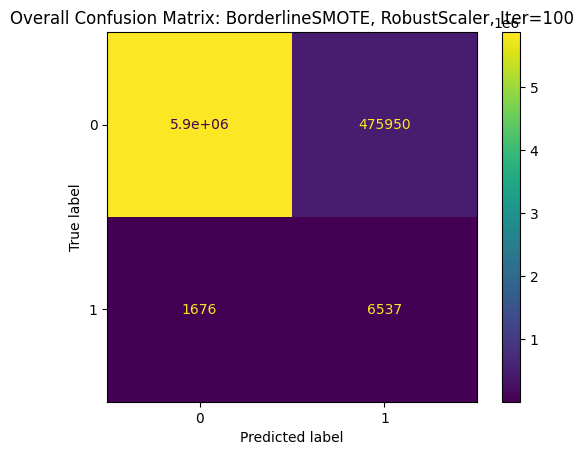

Metrics - Accuracy: 92.49%, Precision: 1.35%, Recall: 79.59%, F1-Score: 2.66%, AUC-ROC: 86.05%


In [64]:
# Dictionary of resampling methods
resampling_methods = {
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'NearMiss': NearMiss(),
    #'CondensedNearestNeighbour': CondensedNearestNeighbour(random_state=42),
    'SMOTE': SMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42)
}

scaling_methods = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
}

def run_experiments(X, y, resampling_methods, scalers, iterations_list):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    results = []

    for name, resampler in resampling_methods.items():
        for scaler_name, scaler in scalers.items():
            X_scaled = scaler.fit_transform(X)  # Apply scaling
            for max_iter in iterations_list:
                model = LogisticRegression(max_iter=max_iter, random_state=42)
                all_y_test = []
                all_y_pred = []
                print(f"\n{name} + {scaler_name} + max_iter={max_iter}")
                for train_index, test_index in kf.split(X_scaled, y):
                    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
                    y_train, y_test = y[train_index], y[test_index]

                    # Resampling
                    if resampler:
                        X_train, y_train = resampler.fit_resample(X_train, y_train)

                    # Fit model
                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    
                    # Accumulate the results
                    all_y_test.extend(y_test)
                    all_y_pred.extend(y_pred)

                # Compute overall metrics
                accuracy = accuracy_score(all_y_test, all_y_pred)
                precision = precision_score(all_y_test, all_y_pred)
                recall = recall_score(all_y_test, all_y_pred)
                f1 = f1_score(all_y_test, all_y_pred)
                auc_roc = roc_auc_score(all_y_test, all_y_pred)
                
                results.append({
                    "Resampler": name,
                    "Scaler": scaler_name,
                    "Max Depth": max_depth,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall,
                    "F1-Score": f1,
                    "AUC-ROC": auc_roc
                })

                # Display the overall confusion matrix
                cm = confusion_matrix(all_y_test, all_y_pred)
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot()
                plt.title(f'Overall Confusion Matrix: {name}, {scaler_name}, Iter={max_iter}')
                plt.show()

                print(f"Metrics - Accuracy: {accuracy*100:.2f}%, Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%, F1-Score: {f1*100:.2f}%, AUC-ROC: {auc_roc*100:.2f}%")

    # Sorting results by recall and print the top 10
    top_results = sorted(results, key=lambda x: x['Recall'], reverse=True)[:10]
    for result in top_results:
        print(f"Top Configurations by Recall: {result}")


iterations_list = [10, 30, 50, 100]
run_experiments(X, y, resampling_methods, scaling_methods, iterations_list)

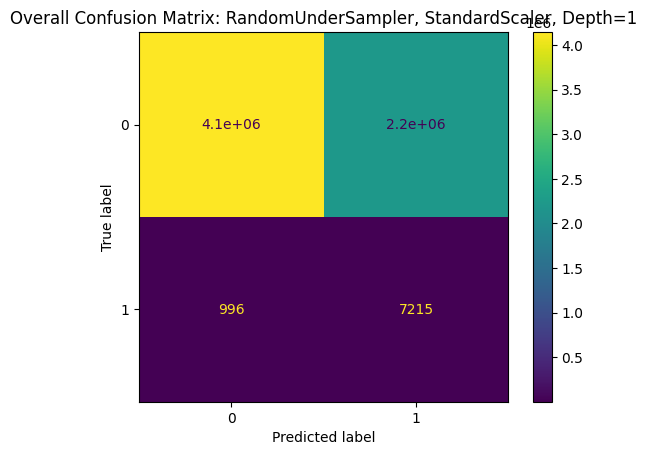

Metrics - Accuracy: 65.28%, Precision: 0.33%, Recall: 87.87%, F1-Score: 0.65%, AUC-ROC: 76.56%


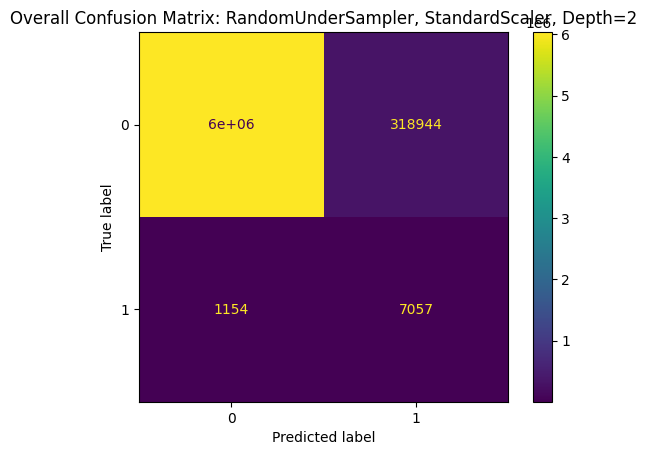

Metrics - Accuracy: 94.97%, Precision: 2.16%, Recall: 85.95%, F1-Score: 4.22%, AUC-ROC: 90.46%


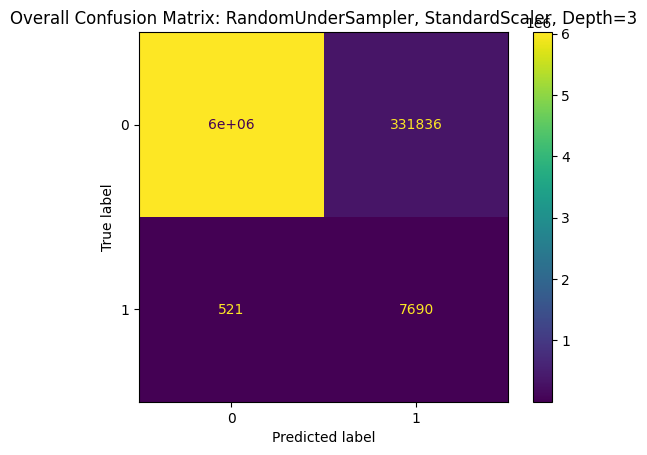

Metrics - Accuracy: 94.78%, Precision: 2.26%, Recall: 93.65%, F1-Score: 4.42%, AUC-ROC: 94.22%


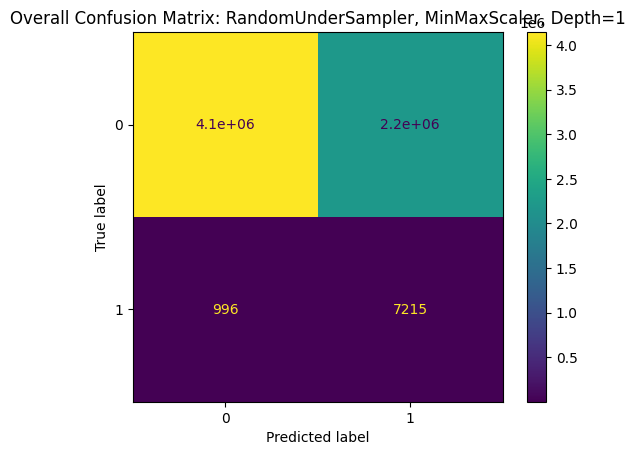

Metrics - Accuracy: 65.28%, Precision: 0.33%, Recall: 87.87%, F1-Score: 0.65%, AUC-ROC: 76.56%


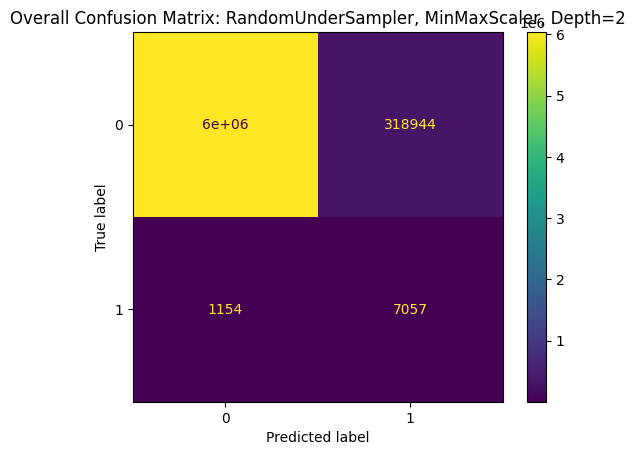

Metrics - Accuracy: 94.97%, Precision: 2.16%, Recall: 85.95%, F1-Score: 4.22%, AUC-ROC: 90.46%


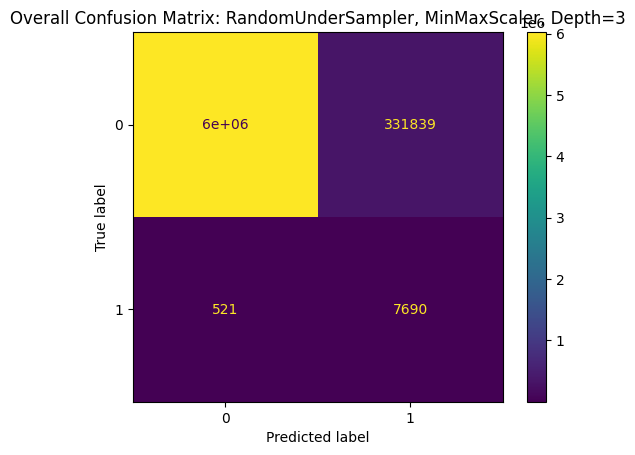

Metrics - Accuracy: 94.78%, Precision: 2.26%, Recall: 93.65%, F1-Score: 4.42%, AUC-ROC: 94.22%


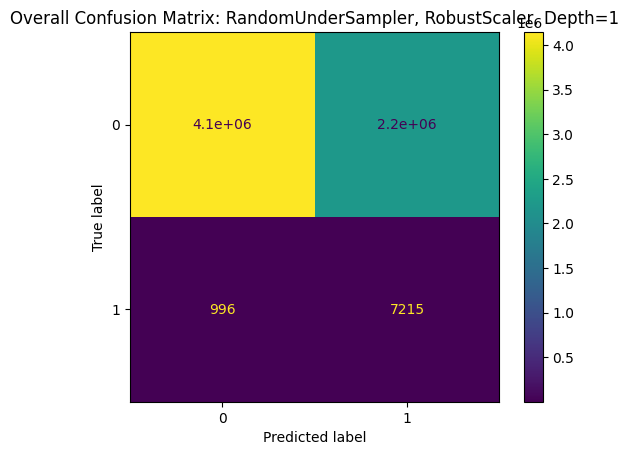

Metrics - Accuracy: 65.28%, Precision: 0.33%, Recall: 87.87%, F1-Score: 0.65%, AUC-ROC: 76.56%


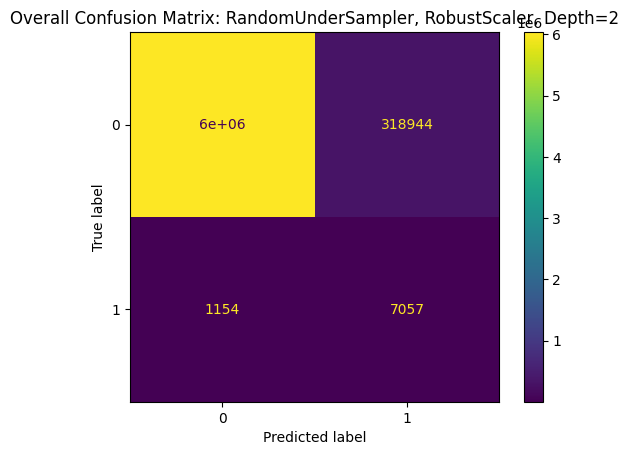

Metrics - Accuracy: 94.97%, Precision: 2.16%, Recall: 85.95%, F1-Score: 4.22%, AUC-ROC: 90.46%


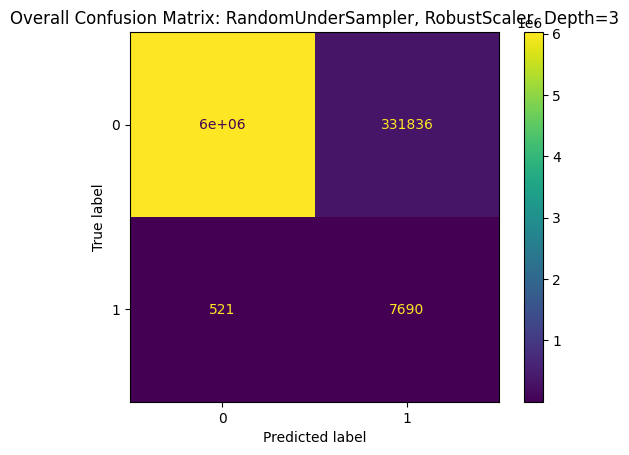

Metrics - Accuracy: 94.78%, Precision: 2.26%, Recall: 93.65%, F1-Score: 4.42%, AUC-ROC: 94.22%


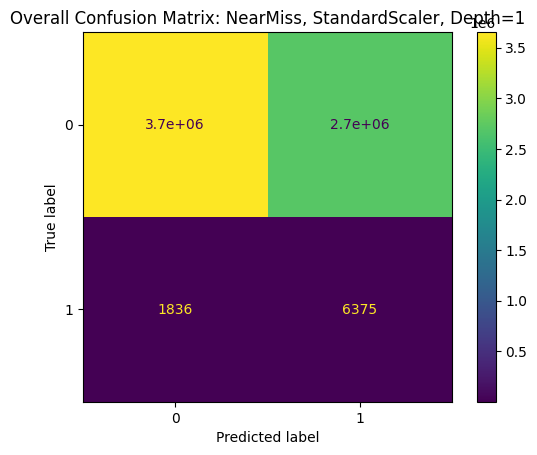

Metrics - Accuracy: 57.53%, Precision: 0.24%, Recall: 77.64%, F1-Score: 0.47%, AUC-ROC: 67.57%


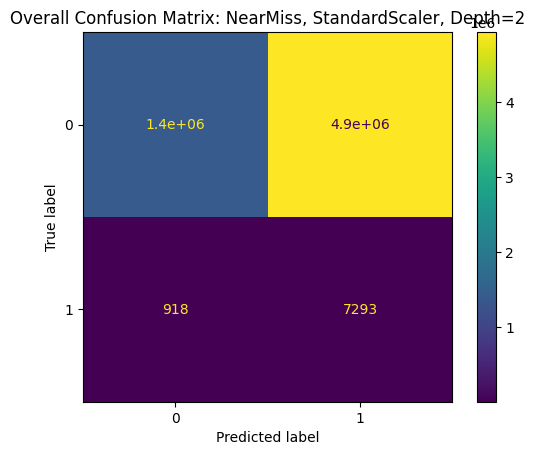

Metrics - Accuracy: 22.37%, Precision: 0.15%, Recall: 88.82%, F1-Score: 0.29%, AUC-ROC: 55.55%


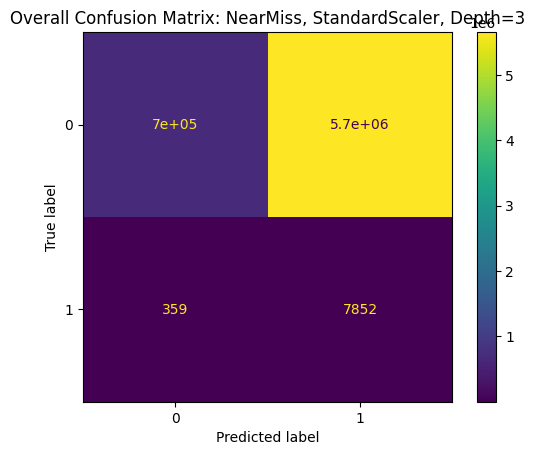

Metrics - Accuracy: 11.10%, Precision: 0.14%, Recall: 95.63%, F1-Score: 0.28%, AUC-ROC: 53.31%


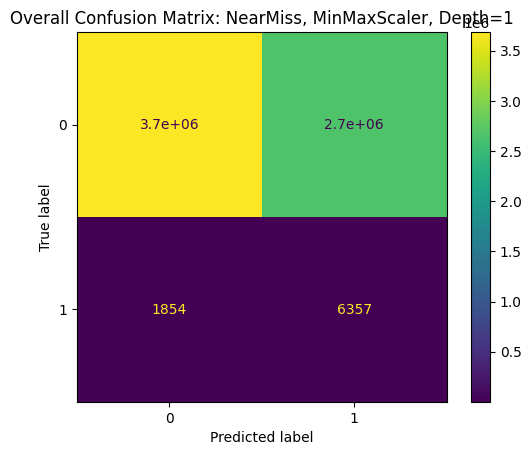

Metrics - Accuracy: 58.03%, Precision: 0.24%, Recall: 77.42%, F1-Score: 0.47%, AUC-ROC: 67.71%


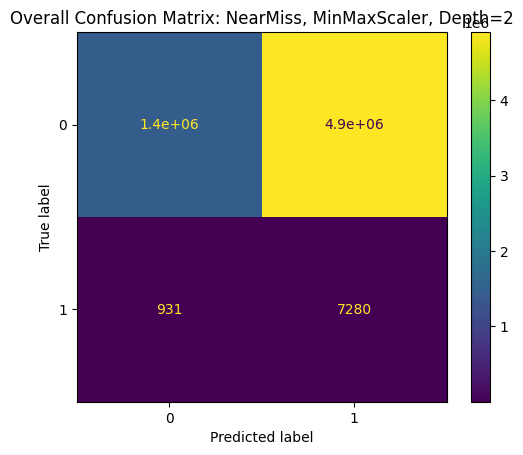

Metrics - Accuracy: 22.89%, Precision: 0.15%, Recall: 88.66%, F1-Score: 0.30%, AUC-ROC: 55.73%


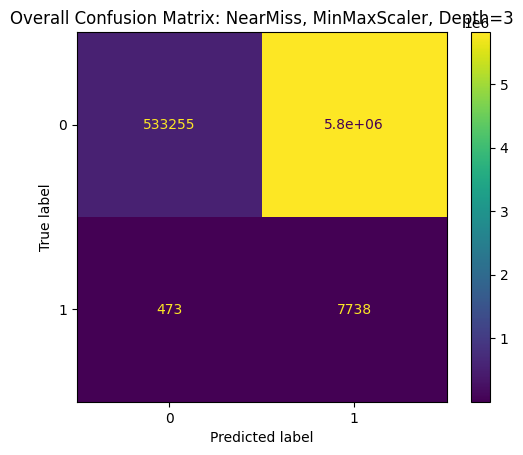

Metrics - Accuracy: 8.50%, Precision: 0.13%, Recall: 94.24%, F1-Score: 0.27%, AUC-ROC: 51.32%


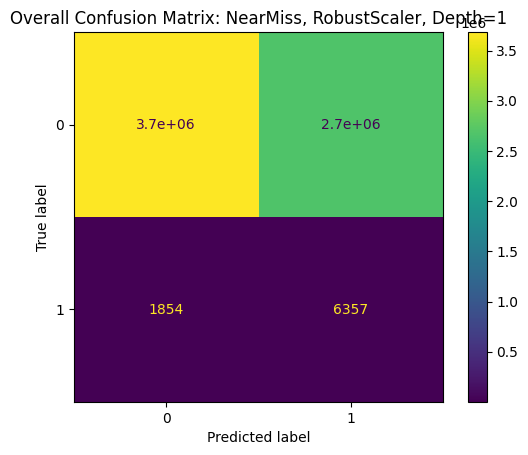

Metrics - Accuracy: 57.99%, Precision: 0.24%, Recall: 77.42%, F1-Score: 0.47%, AUC-ROC: 67.70%


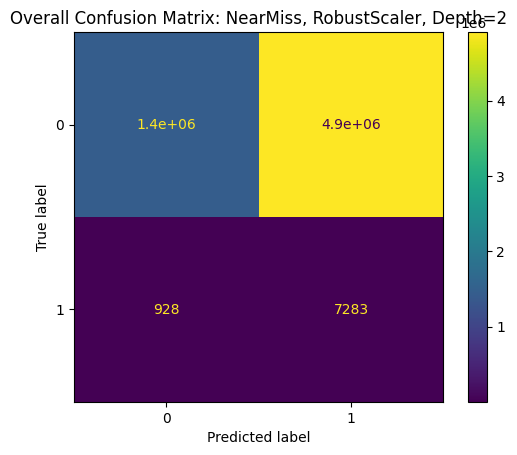

Metrics - Accuracy: 22.80%, Precision: 0.15%, Recall: 88.70%, F1-Score: 0.30%, AUC-ROC: 55.71%


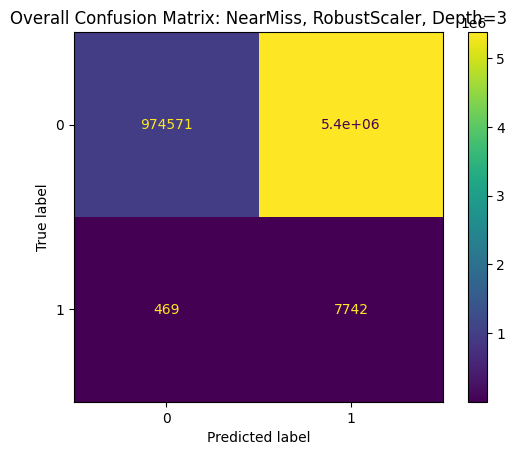

Metrics - Accuracy: 15.44%, Precision: 0.14%, Recall: 94.29%, F1-Score: 0.29%, AUC-ROC: 54.81%


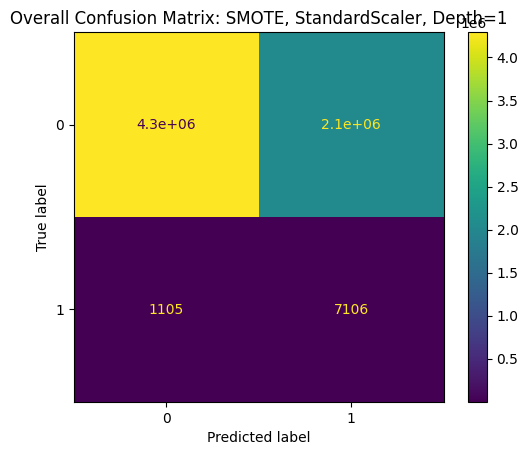

Metrics - Accuracy: 67.61%, Precision: 0.34%, Recall: 86.54%, F1-Score: 0.68%, AUC-ROC: 77.06%


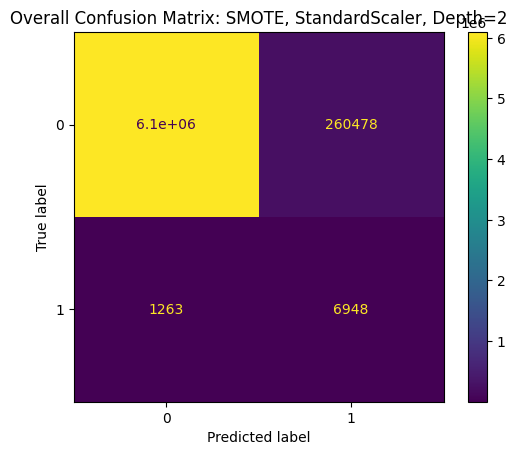

Metrics - Accuracy: 95.89%, Precision: 2.60%, Recall: 84.62%, F1-Score: 5.04%, AUC-ROC: 90.26%


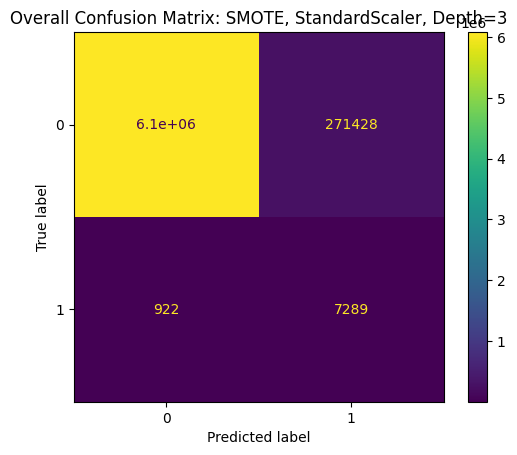

Metrics - Accuracy: 95.72%, Precision: 2.62%, Recall: 88.77%, F1-Score: 5.08%, AUC-ROC: 92.25%


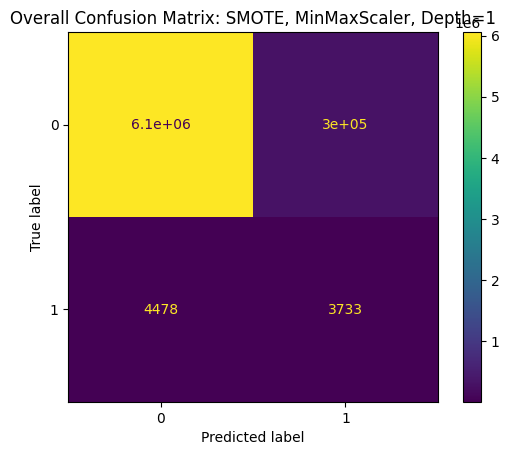

Metrics - Accuracy: 95.29%, Precision: 1.25%, Recall: 45.46%, F1-Score: 2.43%, AUC-ROC: 70.41%


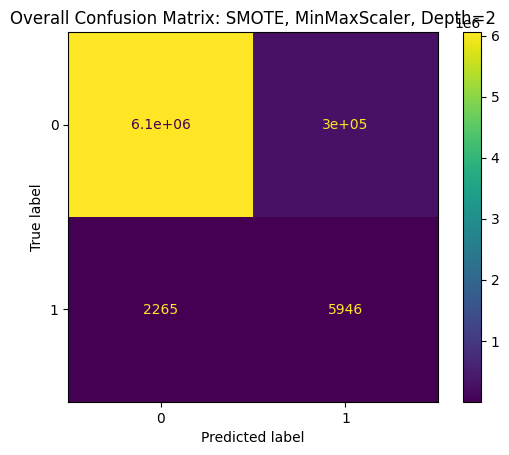

Metrics - Accuracy: 95.30%, Precision: 1.96%, Recall: 72.42%, F1-Score: 3.82%, AUC-ROC: 83.87%


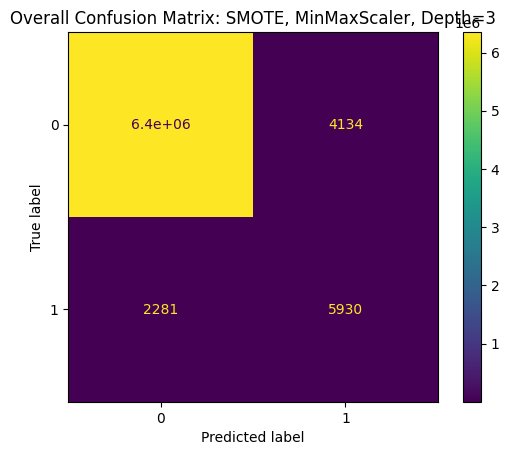

Metrics - Accuracy: 99.90%, Precision: 58.92%, Recall: 72.22%, F1-Score: 64.90%, AUC-ROC: 86.08%


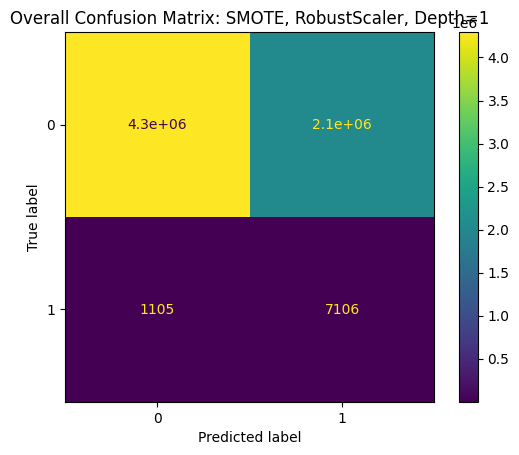

Metrics - Accuracy: 67.61%, Precision: 0.34%, Recall: 86.54%, F1-Score: 0.68%, AUC-ROC: 77.06%


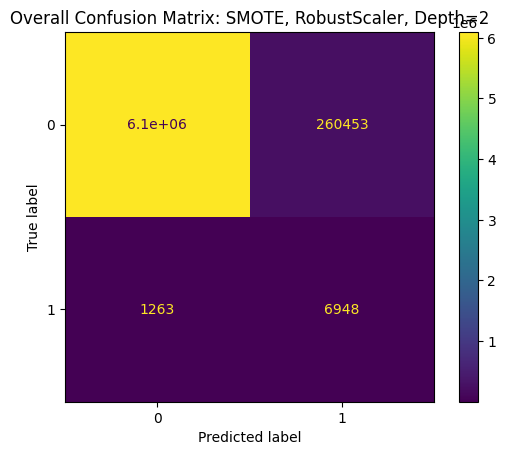

Metrics - Accuracy: 95.89%, Precision: 2.60%, Recall: 84.62%, F1-Score: 5.04%, AUC-ROC: 90.26%


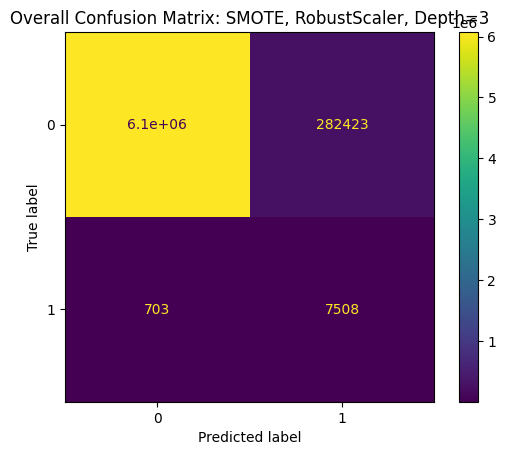

Metrics - Accuracy: 95.55%, Precision: 2.59%, Recall: 91.44%, F1-Score: 5.04%, AUC-ROC: 93.50%


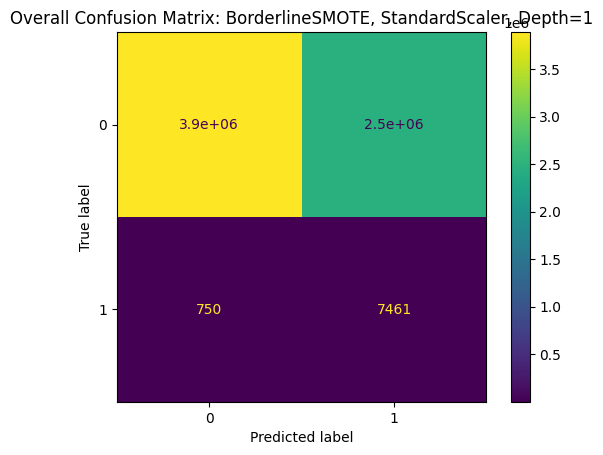

Metrics - Accuracy: 61.25%, Precision: 0.30%, Recall: 90.87%, F1-Score: 0.60%, AUC-ROC: 76.04%


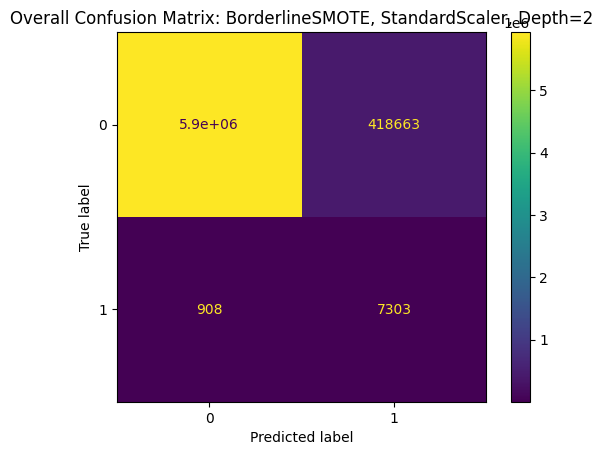

Metrics - Accuracy: 93.41%, Precision: 1.71%, Recall: 88.94%, F1-Score: 3.36%, AUC-ROC: 91.18%


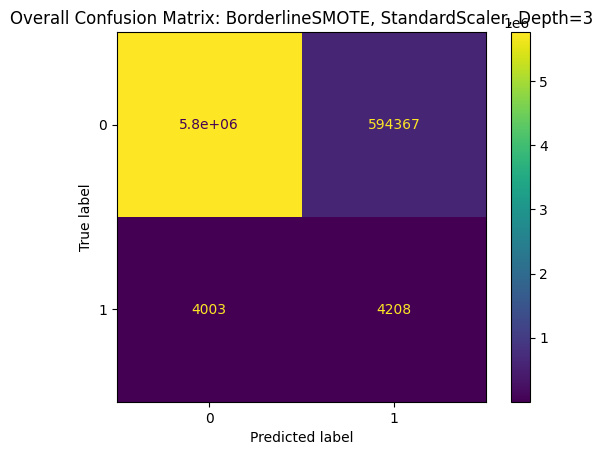

Metrics - Accuracy: 90.60%, Precision: 0.70%, Recall: 51.25%, F1-Score: 1.39%, AUC-ROC: 70.95%


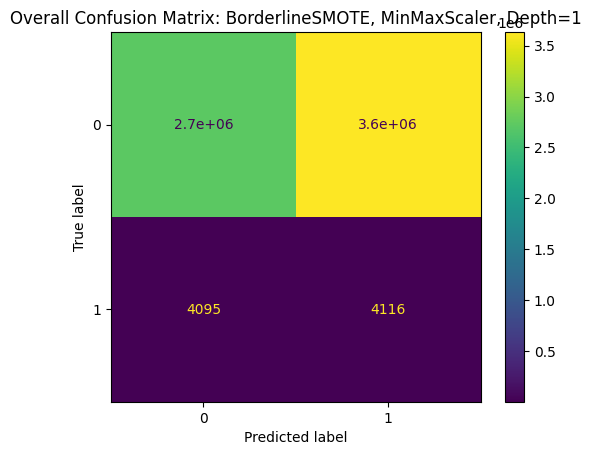

Metrics - Accuracy: 42.84%, Precision: 0.11%, Recall: 50.13%, F1-Score: 0.23%, AUC-ROC: 46.48%


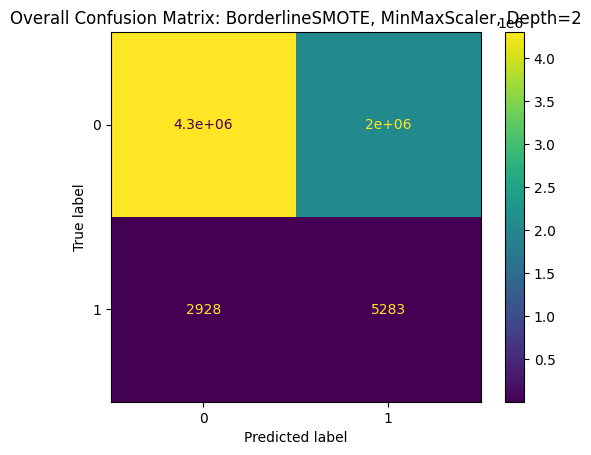

Metrics - Accuracy: 67.78%, Precision: 0.26%, Recall: 64.34%, F1-Score: 0.51%, AUC-ROC: 66.06%


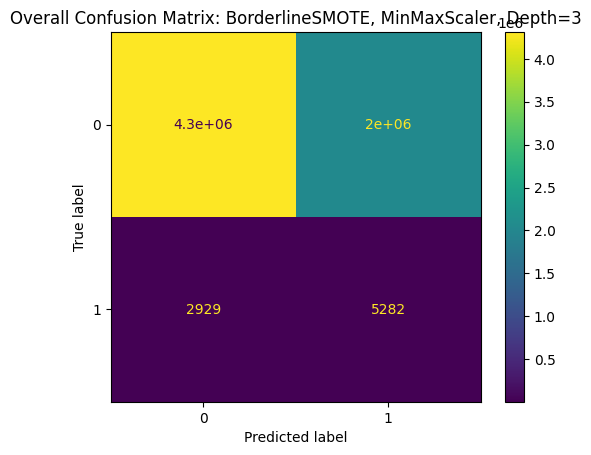

Metrics - Accuracy: 67.85%, Precision: 0.26%, Recall: 64.33%, F1-Score: 0.51%, AUC-ROC: 66.09%


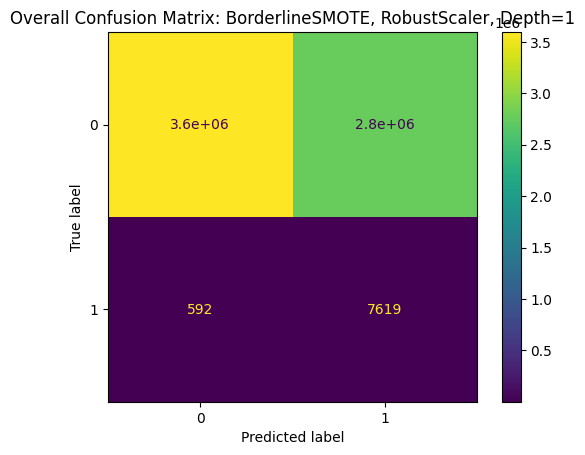

Metrics - Accuracy: 56.61%, Precision: 0.28%, Recall: 92.79%, F1-Score: 0.55%, AUC-ROC: 74.68%


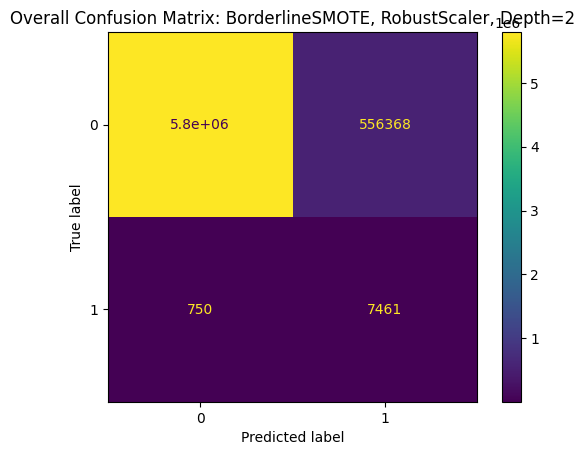

Metrics - Accuracy: 91.24%, Precision: 1.32%, Recall: 90.87%, F1-Score: 2.61%, AUC-ROC: 91.06%


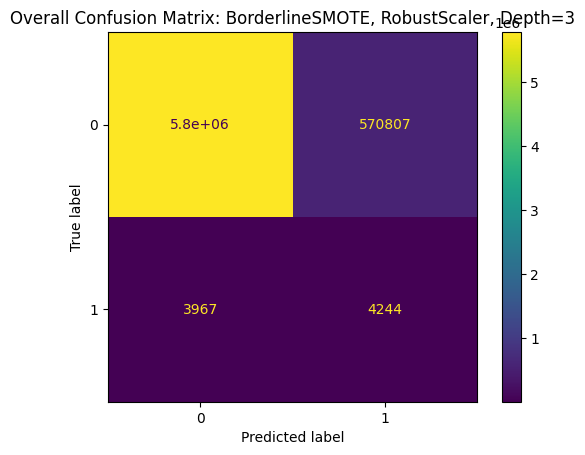

Metrics - Accuracy: 90.97%, Precision: 0.74%, Recall: 51.69%, F1-Score: 1.46%, AUC-ROC: 71.35%
Top Configurations by Recall: {'Resampler': 'NearMiss', 'Scaler': 'StandardScaler', 'Max Depth': 3, 'Accuracy': 0.11103813274288438, 'Precision': 0.0013863934278030149, 'Recall': 0.9562781634392887, 'F1-Score': 0.002768772742892193, 'AUC-ROC': 0.5331120492909591}
Top Configurations by Recall: {'Resampler': 'NearMiss', 'Scaler': 'RobustScaler', 'Max Depth': 3, 'Accuracy': 0.15438822647791411, 'Precision': 0.0014370098909045551, 'Recall': 0.9428815004262575, 'F1-Score': 0.0028696462629084507, 'AUC-ROC': 0.5481254280075092}
Top Configurations by Recall: {'Resampler': 'NearMiss', 'Scaler': 'MinMaxScaler', 'Max Depth': 3, 'Accuracy': 0.08502681915740318, 'Precision': 0.001327525936336399, 'Recall': 0.9423943490439655, 'F1-Score': 0.002651317032656119, 'AUC-ROC': 0.5131566498780546}
Top Configurations by Recall: {'Resampler': 'RandomUnderSampler', 'Scaler': 'StandardScaler', 'Max Depth': 3, 'Accura

In [122]:
# Dictionary of resampling methods
resampling_methods = {
    'RandomUnderSampler': RandomUnderSampler(random_state=42),
    'NearMiss': NearMiss(),
    'SMOTE': SMOTE(random_state=42),
    'BorderlineSMOTE': BorderlineSMOTE(random_state=42)
}

# Dictionary of scaling methods
scaling_methods = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
}

def run_decision_tree_experiments(X, y, resampling_methods, scalers, depth_list):
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    X = pd.DataFrame(X)
    y = pd.Series(y).reset_index(drop=True)

    results = []
    
    for name, resampler in resampling_methods.items():
        for scaler_name, scaler in scalers.items():
            X_scaled = scaler.fit_transform(X)
            X_scaled = pd.DataFrame(X_scaled)
            
            for max_depth in depth_list:
                model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
                all_y_test = []
                all_y_pred = []
                
                for train_index, test_index in kf.split(X_scaled, y):
                    X_train, X_test = X_scaled.iloc[train_index], X_scaled.iloc[test_index]
                    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

                    if resampler:
                        X_train, y_train = resampler.fit_resample(X_train, y_train)

                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)

                    all_y_test.extend(y_test)
                    all_y_pred.extend(y_pred)

                accuracy = accuracy_score(all_y_test, all_y_pred)
                precision = precision_score(all_y_test, all_y_pred, zero_division=0)
                recall = recall_score(all_y_test, all_y_pred)
                f1 = f1_score(all_y_test, all_y_pred)
                auc_roc = roc_auc_score(all_y_test, all_y_pred)

                results.append({
                    "Resampler": name,
                    "Scaler": scaler_name,
                    "Max Depth": max_depth,
                    "Accuracy": accuracy,
                    "Precision": precision,
                    "Recall": recall,
                    "F1-Score": f1,
                    "AUC-ROC": auc_roc
                })

                cm = confusion_matrix(all_y_test, all_y_pred)
                disp = ConfusionMatrixDisplay(confusion_matrix=cm)
                disp.plot()
                plt.title(f'Overall Confusion Matrix: {name}, {scaler_name}, Depth={max_depth}')
                plt.show()
                
                print(f"Metrics - Accuracy: {accuracy*100:.2f}%, Precision: {precision*100:.2f}%, Recall: {recall*100:.2f}%, F1-Score: {f1*100:.2f}%, AUC-ROC: {auc_roc*100:.2f}%")


    # Sorting results by recall and print the top 10
    top_results = sorted(results, key=lambda x: x['Recall'], reverse=True)[:10]
    for result in top_results:
        print(f"Top Configurations by Recall: {result}")

# Example usage
depth_list = [1, 2, 3]
run_decision_tree_experiments(X, y, resampling_methods, scaling_methods, depth_list)


# Clustering algorithm

In [1]:
# RandomUnderSampler 객체 생성
# NearMiss 객체 생성
nm = NearMiss()

# 학습 데이터에 언더샘플링 적용
X_, y_ = nm.fit_resample(X, y)

# 언더샘플링된 데이터 크기 확인
print('X_train_random_undersampled shape:', X_.shape)
print('y_train_random_undersampled shape:', y_.shape)

# 클래스 균형 확인
print(y_.value_counts())

# 시각화를 위해 데이터프레임으로 변환
random_undersampled_train_data = pd.concat([pd.DataFrame(X_, columns=X_.columns), pd.DataFrame(y_, columns=['isFraud'])], axis=1)

# 클래스 분포 시각화
sns.countplot(x='isFraud', data=random_undersampled_train_data)
plt.title('Class Distribution after UnderSampling')
plt.show()

def run_clustering_experiments(X, scalers, k_list):
    results = []
    
    for scaler_name, scaler in scalers.items():
        X_scaled = scaler.fit_transform(X)
        
        for k in k_list:
            kmeans = KMeans(n_clusters=k, random_state=42)
            cluster_labels = kmeans.fit_predict(X_scaled)
            silhouette_avg = silhouette_score(X_scaled, cluster_labels)
            
            results.append({
                "Scaler": scaler_name,
                "Clusters": k,
                "Silhouette Score": silhouette_avg
            })
            
            # Optionally, reduce dimensions to 2D using PCA and plot the results
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X_scaled)
            plt.figure(figsize=(10, 6))
            plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
            plt.title(f'PCA Cluster Plot: {scaler_name} with k={k}')
            plt.colorbar()
            plt.show()
    
    # Sorting results by Silhouette Score and print the top configurations
    top_results = sorted(results, key=lambda x: x['Silhouette Score'], reverse=True)[:5]
    for result in top_results:
        print(f"Top Configurations by Silhouette Score: {result}")

scaling_methods = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler(),
    'RobustScaler': RobustScaler(),
}
k_list = [2, 3, 4, 5, 6]  

run_clustering_experiments(X_, scaling_methods, k_list)


NameError: name 'NearMiss' is not defined

# Others

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

# Splitted Data
print('X_train shape is ' , X_train.shape)
print('X_test shape is ' , X_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

X_train shape is  (4453834, 6)
X_test shape is  (1908786, 6)
y_train shape is  (4453834,)
y_test shape is  (1908786,)


X_train_random_undersampled shape: (11498, 6)
y_train_random_undersampled shape: (11498,)
isFraud
0    5749
1    5749
Name: count, dtype: int64


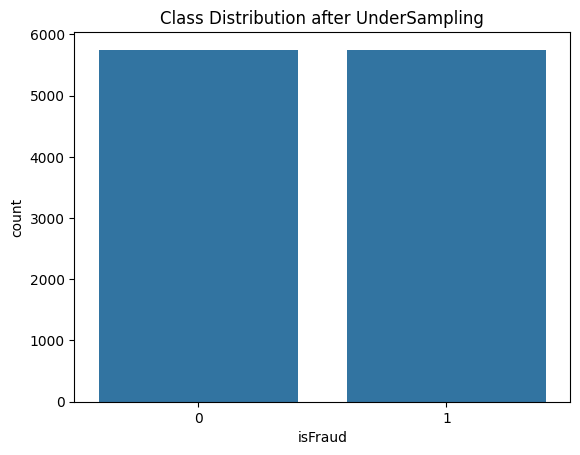

In [30]:
from imblearn.under_sampling import RandomUnderSampler

# RandomUnderSampler 객체 생성
rus = RandomUnderSampler(random_state=42)

# 학습 데이터에 언더샘플링 적용
X_train_random_undersampled, y_train_random_undersampled = rus.fit_resample(X, y_train)

# 언더샘플링된 데이터 크기 확인
print('X_train_random_undersampled shape:', X_train_random_undersampled.shape)
print('y_train_random_undersampled shape:', y_train_random_undersampled.shape)

# 클래스 균형 확인
print(y_train_random_undersampled.value_counts())

# 시각화를 위해 데이터프레임으로 변환
random_undersampled_train_data = pd.concat([pd.DataFrame(X_train_random_undersampled, columns=X_train.columns), pd.DataFrame(y_train_random_undersampled, columns=['isFraud'])], axis=1)

# 클래스 분포 시각화
sns.countplot(x='isFraud', data=random_undersampled_train_data)
plt.title('Class Distribution after UnderSampling')
plt.show()

In [31]:
# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train, y_train)


isFraud
0    4448085
1    4448085
Name: count, dtype: int64


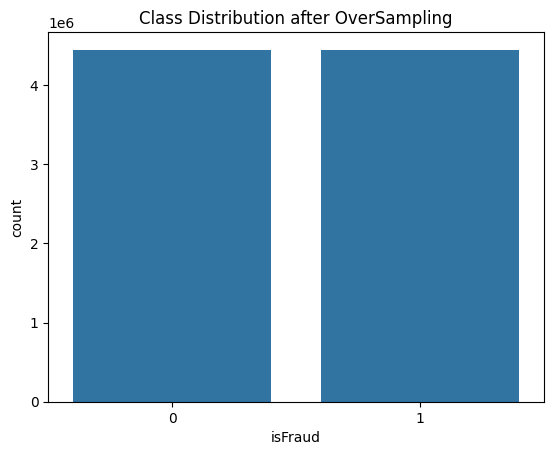

In [34]:
# 클래스 균형 확인
print(y_train_resampled.value_counts())

# 시각화를 위해 데이터프레임으로 변환
resampled_train_data = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), pd.DataFrame(y_train_resampled, columns=['isFraud'])], axis=1)

# 클래스 분포 시각화
sns.countplot(x='isFraud', data=resampled_train_data)
plt.title('Class Distribution after OverSampling')
plt.show()
